**Конкурентный анализ и выбор географического расположения**

In [ ]:
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy

In [ ]:
from requests.compat import urljoin, quote_plus, urlparse, unquote

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
import re

In [ ]:
import requests
import chardet

# достаем информацию из сайта со станциями метро
url = 'http://www.lovrikinfo.ru/metrogps.php'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)


In [ ]:
pattern = r'<tr><td>(.*?)</td><td>(.*?)</td><td>(.*?)</td></tr>'
matches = re.findall(pattern, html)
subway_coord = dict()

for m in matches:
    station, latitude, longitude = m
    if '(стр.)' in station:
      station = station[:len(station) - 7]
    elif 'Китай' in station:
      station = 'Китай-город'
    subway_coord[station] = [float(latitude), float(longitude)]
subway_coord

{'Аэропорт': [55.79981, 37.53412],
 'Академическая': [55.68808, 37.57501],
 'Алексеевская': [55.80737, 37.63844],
 'Александровский сад': [55.75219, 37.60836],
 'Алтуфьево': [55.89504, 37.58605],
 'Аннино': [55.581818, 37.594978],
 'Арбатская': [55.75228, 37.60357],
 'Авиамоторная': [55.75208, 37.71677],
 'Автозаводская': [55.70801, 37.65858],
 'Бабушкинская': [55.86814, 37.66292],
 'Багратионовская': [55.74326, 37.49753],
 'Баррикадная': [55.76027, 37.58111],
 'Бауманская': [55.77228, 37.67857],
 'Беговая': [55.77378, 37.54412],
 'Белорусская': [55.77492, 37.58207],
 'Беляево': [55.64371, 37.52762],
 'Бибирево': [55.88294, 37.60523],
 'Библиотека им. Ленина': [55.75211, 37.60988],
 'Битцевский парк': [55.60029, 37.55735],
 'Боровицкая': [55.75034, 37.60857],
 'Ботанический сад': [55.84649, 37.63914],
 'Братеево': [55.631363, 37.75174],
 'Братиславская': [55.66126, 37.7509],
 'Чеховская': [55.76596, 37.6075],
 'Черкизовская': [55.802, 37.74438],
 'Чертаново': [55.63978, 37.60893],
 'Чи

In [ ]:
# добавляем недостающие станции
subway_coord['Молодёжная'] = [55.741375, 37.415627]
subway_coord['Селигерская'] = [55.86483, 37.55005]
subway_coord['Сокол'] = [55.805564, 37.515245]
subway_coord['Ховрино'] = [55.8777, 37.4877]
subway_coord['Саларьево'] = [55.6227, 37.424]
subway_coord['Текстильщики'] = [55.709211, 37.732117]
subway_coord['Тёплый стан'] = [55.61873, 37.505912]
subway_coord['Юго-Западная'] = [55.663146, 37.482852]
subway_coord['Солнцево'] = [55.649, 37.3911]
subway_coord['Лермонтовский проспект'] = [55.702036, 37.851044]
subway_coord['Котельники'] = [55.6743, 37.8582]

In [ ]:
# из кода в PyCharm
corts_names = ['Спортивный зал №2 "Столица спорта"', 'Универсальный зал Спортивного комплекса «ИГРА» Солнцево', 'Волейбольный зал Академия Будущего м.Терехово', 'Универсальный спортзал «Активити Холл»', 'Площадки для пляжного волейбола и тенниса "Жара"', 'Универсальный зал в Игровом центре', 'Теннисный корт «Плей Теннис» (Останкино)', 'Зал в Хорошёво', 'Универсальный зал "Basket Point"', 'Универсальные залы для игровых видов спорта "Высшая Лига"', 'Волейбольная/Баскетбольная площадка SportVille', 'Универсальный зал 25х12х7 СК «Форвард»', 'Универсальный зал "Спорт Ангар" Нагорная ДО 15 ЧЕЛОВЕК !!', 'Универсальный манеж Академия Будущего м.Терехово', 'Баскетбольно-волейбольная площадка №1 «Дабл ГИС Арена»', 'Зал для волейбола "SUNVOLLEY school" на Бауманской', 'Спортивный зал №2 "Столица спорта"', 'Универсальный зал Спортивного комплекса «ИГРА» Солнцево', 'Волейбольный зал Академия Будущего м.Терехово', 'Универсальный спортзал «Активити Холл»', 'Площадки для пляжного волейбола и тенниса "Жара"', 'Универсальный зал в Игровом центре', 'Теннисный корт «Плей Теннис» (Останкино)', 'Зал в Хорошёво', 'Универсальный зал "Basket Point"', 'Универсальные залы для игровых видов спорта "Высшая Лига"', 'Волейбольная/Баскетбольная площадка SportVille', 'Универсальный зал 25х12х7 СК «Форвард»', 'Универсальный зал "Спорт Ангар" Нагорная ДО 15 ЧЕЛОВЕК !!', 'Универсальный манеж Академия Будущего м.Терехово', 'Баскетбольно-волейбольная площадка №1 «Дабл ГИС Арена»', 'Зал для волейбола "SUNVOLLEY school" на Бауманской', 'Спортивный зал №2 "Столица спорта"', 'Спортзал на Водном стадионе', 'Баскетбольно-волейбольная площадка №2 «Дабл ГИС Арена»', 'Универсальный зал Campus "Белорусская"', 'СпортСоюз Маяковская', 'Залы для классического волейбола "LaPlageClub"', 'Универсальный зал в СК «Октябрьский»', 'Универсальный зал Campus-Hoops №4 24x16', 'Спортивный зал №2 "Столица спорта"', 'Игровой зал в РЦ "Первомайский"', 'Физкультурно-оздоровительный Комплекс "Водник" универсальный зал 32x20', 'Универсальный зал Campus "Водный" 17х9', 'Спортивный зал №3 "Столица спорта"', 'Универсальный зал Campus "Молния" №2 Новая площадка!', 'Универсальный спортивный зал SportActiv (278 кв.м)', 'Универсальный спортивный зал', 'Спортивный зал №2 "Столица спорта"', 'Универсальный зал Campus "Авиамоторная" 30х19', 'Универсальный зал Campus "Водный" 17x9 2 зал', 'Зал для волейбола и баскетбола на Достоевской', 'Универсальный спортивный зал "Луч" 40х20 №1', 'Спортивный зал №1 "Столица спорта"', 'Универсальный зал Фок "Лидер"', 'Универсальный зал Campus "Капитолий" №3 32x16', 'Универсальный зал Campus "Синергия"', 'Зал для игровых видов спорта С.С.С.Р.', 'Универсальный спортивный зал "Луч" 40х20 №2', 'Универсальный спортивный зал 340 кв.м. "Фортуна"', 'Универсальный зал Campus "Капитолий" №2 32x16', 'Спортивный игровой зал «АПИА АРЕНА» 313 кв.м.', 'Площадка для волейбола\\баскетбола Стадион "Курчатовец"', 'Универсальный зал Campus «Беляево»', 'Спортивный зал №2 "Столица спорта"', 'Универсальный зал Campus "Перово" 29х21', 'Универсальные спортивные залы "Небо Арена"', 'Универсальный зал в Физкультурном комплексе «Спартак»', 'Универсальный зал Campus "Капитолий" №1 32x16', 'Универсальный зал Сampus "Орджоникидзе"', 'Универсальный зал Campus "Таганка"', 'Универсальный зал Campus "Шелепиха"', 'Игровой зал "Чкалов Арена"', 'Универсальный зал 325 кв.м. Корпус Ф «МЭИ»', 'Волейбольная площадка в Парке Мещерский', 'Корт/волейбольная площадка Air Arena', 'Спортзал в Учебно-методическом центре Голицыно, Одинцовский район, город Голицыно', 'Волейбольно-баскетбольная площадка на ВДНХ', 'Универсальный зал Campus "Молния" №3 Новая площадка!', 'Универсальный зал Campus "Молния" №1 Новая площадка!', 'Спортивный зал №2 "Столица спорта"', 'Универсальный зал 612 кв.м. Корпус Н «МЭИ»', 'Универсальный спортзал Академия Будущего м. Профсоюзная', 'Универсальный зал "Фестивальный парк"', 'Универсальный зал', 'Спортивный зал 800 кв.м. "Gym Space" Красногорск', 'Спортзал для волейбола и баскетбола на южной', 'Центральная спортивная арена волейбольной арены "Динамо"', 'Малый тренировочный зал волейбольной арены "Динамо"', 'Большой тренировочный зал волейбольной арены "Динамо"', 'Волейбольный зал на Панфиловской', 'Волейбольный зал на Братиславской', 'Волейбольно-Баскетбольный зал на Электрозаводской', 'Волейбольно-Баскетбольный зал на Кунцевской', 'Волейбольно-баскетбольный зал на Дмитровской', 'Зал для волейбола и баскетбола в Ховрино', 'Спортивный зал №2 "Столица спорта"', 'Академия спорта "Динамо". 2 новые площадки для баскетбола и волейбола', 'Спортивный зал в Ростокино', 'Волейбольно-Баскетбольный зал на Хибинском проезде', 'Волейбольно-баскетбольный зал на Римской', 'Волейбольно -баскетбольный зал на Речников', 'Универсальный зал пос.Внуково', 'Универсальный зал в Косино', 'Футбольно-волейбольный зал в Ховрино', 'Универсальный зал на Речном вокзале', 'Универсальный зал на Молодежной', 'Универсальный зал на Марксисткой', 'Универсальный зал на Алексеевской', 'Универсальный зал м. Кунцевская(МЦД Сетунь)', 'Универсальный зал в Тропарево', 'Волейбольно-Баскетбольный спортзал на Соколе']
corts_metro_stations = ['Новокосино', 'Солнцево', 'Терехово', 'Водный стадион', 'Молодёжная', 'Текстильщики', 'ВДНХ', 'Октябрьское поле', 'Селигерская', 'Нагатинская', 'Крылатское', 'Белорусская', 'Нагорная', 'Терехово', 'Тёплый стан', 'Бауманская', 'Новокосино', 'Солнцево', 'Терехово', 'Водный стадион', 'Молодёжная', 'Текстильщики', 'ВДНХ', 'Октябрьское поле', 'Селигерская', 'Нагатинская', 'Крылатское', 'Белорусская', 'Нагорная', 'Терехово', 'Тёплый стан', 'Бауманская', 'Новокосино', 'Войковская стадион', 'Тёплый стан', 'Белорусская', 'Тверская бульвар', 'Нагорная', 'Котельники', 'Водный стадион', 'Новокосино', 'Первомайская', 'Речной вокзал', 'Водный стадион', 'Новокосино', 'Яхромская', 'Калужская', 'Новокосино', 'Новокосино', 'Авиамоторная', 'Водный стадион', 'Новослободская', 'Перово', 'Новокосино', 'Лермонтовский проспект', 'Водный стадион', 'Водный стадион', 'Алексеевская', 'Перово', 'Кожуховская', 'Водный стадион', 'Тимирязевская', 'Щукинская поле', 'Беляево', 'Новокосино', 'Перово', 'Саларьево', 'Котельники', 'Водный стадион', 'Ленинский проспект', 'Таганская', 'Выставочная центр', 'Тушинская', 'Авиамоторная', 'Юго-Западная', 'Крылатское', 'Ботанический сад', 'Яхромская', 'Яхромская', 'Новокосино', 'Авиамоторная', 'Академическая', 'Марьина роща', 'Новокосино', 'Волоколамская', 'Кантемировская', 'Парк парк', 'Парк парк', 'Парк парк', 'Сокол', 'Люблино', 'Электрозаводская', 'Кунцевская', 'Дмитровская', 'Ховрино', 'Новокосино', 'Динамо парк', 'Медведково сад', 'Бабушкинская', 'Площадь', 'Коломенская бульвар', 'Рассказовка', 'Лермонтовский проспект', 'Речной вокзал', 'Водный стадион', 'Сетунь', 'Таганская', 'Алексеевская', 'Сетунь', 'Коньково стан', 'Динамо']
inside_ttk = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
corts_rating = [5.0, -1, -1, 4.9, 4.8, 5.0, 4.3, 4.9, 5.0, 4.5, -1, 4.6, 4.5, 4.7, 4.8, 4.8, 5.0, -1, -1, 4.9, 4.8, 5.0, 4.3, 4.9, 5.0, 4.5, -1, 4.6, 4.5, 4.7, 4.8, 4.8, 5.0, 4.4, 5.0, 3.6, 4.9, 3.0, -1, 5.0, 5.0, -1, 4.5, 4.7, 4.8, 2.7, 2.9, 3.5, 5.0, 4.6, 5.0, -1, 5.0, 5.0, -1, -1, -1, 3.5, 5.0, 4.7, 4.8, 4.9, -1, 4.5, 5.0, 4.9, -1, -1, 4.8, 4.9, 4.6, 4.8, -1, 5.0, 5.0, 4.5, 4.3, 3.3, -1, 5.0, 5.0, 4.8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5.0, -1, 3.9, 4.1, 4.0, 3.9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [ ]:
# содеиняю залы и станции метро (отдельно с наличием рейтинга и отдельно без него)
final_info_1 = {'court': [], 'station': [], 'inside_ttk': [], 'corts_rating': [], 'lat': [], 'long': []}
final_info_2 = {'court': [], 'station': [], 'inside_ttk': [], 'corts_rating': [], 'lat': [], 'long': []}
A = []
for i in range(len(corts_metro_stations)):
  if corts_metro_stations[i] in subway_coord.keys():
    if corts_rating[i] != -1:
      final_info_1['court'].append(corts_names[i])
      final_info_1['station'].append(corts_metro_stations[i])
      final_info_1['inside_ttk'].append(inside_ttk[i])
      final_info_1['corts_rating'].append(corts_rating[i])
      final_info_1['lat'].append(subway_coord[corts_metro_stations[i]][0])
      final_info_1['long'].append(subway_coord[corts_metro_stations[i]][1])
    else:
      final_info_2['court'].append(corts_names[i])
      final_info_2['station'].append(corts_metro_stations[i])
      final_info_2['inside_ttk'].append(inside_ttk[i])
      final_info_2['corts_rating'].append(corts_rating[i])
      final_info_2['lat'].append(subway_coord[corts_metro_stations[i]][0])
      final_info_2['long'].append(subway_coord[corts_metro_stations[i]][1])


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
# Сощдаем карту со всеми площадками

# Координаты центра Москвы (Красная площадь)
center_of_moscow = dict(lat=55.7539, lon=37.6208)

fig1 = px.scatter_mapbox(final_info_1,
                         lat='lat',
                         lon='long',
                         color_continuous_scale=['blue'],
                         title='Волейбольные площадки в Москве (final_info_1)',
                         zoom=9,
                         center=center_of_moscow,
                         mapbox_style="carto-positron")

fig2 = px.scatter_mapbox(final_info_2,
                         lat='lat',
                         lon='long',
                         color_continuous_scale=['blue'],  # Синий
                         title='Волейбольные площадки в Москве (final_info_2)',
                         zoom=9,
                         center=center_of_moscow,
                         mapbox_style="carto-positron")


fig = go.Figure()
fig.add_trace(fig1.data[0])
fig.add_trace(fig2.data[0])

fig.update_layout(
    title='Волейбольные площадки в Москве',
    mapbox=dict(style="carto-positron", center=center_of_moscow, zoom=9)
)

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Создаем карту со спортивными залами с рейтингом
center_of_moscow = dict(lat=55.7539, lon=37.6208)

fig1 = px.scatter_mapbox(final_info_1,
                         lat='lat',
                         lon='long',
                         color='corts_rating',
                         color_continuous_scale=['red', 'yellowgreen'],
                         title='Волейбольные площадки в Москве',
                         size=[4 for i in range(len(final_info_1['long']))],
                         zoom=9,
                         center=center_of_moscow,
                         mapbox_style="carto-positron")


fig1.show()

**Анализ отзывов**

In [ ]:
corts_lists_of_comments = [['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], [], [], ['\n\t\t\t\t\tПросторный зал, всё четко и понятно \r\nРаздевалки не вау, но переодеться можно \r\nВ целом благодаря самому залу своих денег стоит\t\t\t\t', '\n\t\t\t\t\tОчень уютно и красиво .\r\nПокрытие отлично ,обувь не скользит и это очень обрадовало . Вернемся снова .\t\t\t\t', '\n\t\t\t\t\tПлощадка хорошая, понравилась. Парковку можно было бы бесплатно сделать для клиентов.\r\nИ главное не понравилось, что теперь требуется полная оплата заранее. \t\t\t\t', '\n\t\t\t\t\tДушно в переодевалке.\r\nХороший зал.\t\t\t\t', '\n\t\t\t\t\tДостойный небольшой спортивный комплекс, в пешей доступности от метро, с отличным покрытием, просторные раздевалки. Цена вполне адекватна.\t\t\t\t', '\n\t\t\t\t\tВсе классно, спасибо!\t\t\t\t', '\n\t\t\t\t\tВсе достаточно комфортно, хороший по размерам зал, приятная атмосфера! Персонал отзывчивый!\t\t\t\t', '\n\t\t\t\t\tУжасная работа администрации. Уже не первый раз отдают зал после брони на сайт файндспорт кому то другому. Забронировал свободное время, готов оплатить, но бронь не подтверждают потому что "Обычно в это время у нас играет инвестор, ждём ответа будет и он играть в это воскресенье или нет" А ты сиди вот и жди пока столь важные персоны решать отдать тебе время или нет.\r\nЯ не понимаю к чему вообще весь этот балаган с сервисом бронирования, если по факту это фикция.\r\nНе первая проблема с этим залом и не только у меня.\r\n\r\nНу и конечно время забрал влделец, а не постоянный клиент. Клиентоориентироанность хай левел\t\t\t\t', '\n\t\t\t\t\tОтлично!\r\nСпасибо за чистоту!\t\t\t\t', '\n\t\t\t\t\tВсе прошло отлично, администратор Алена просто молодец, ей отдельное спасибо.\t\t\t\t', '\n\t\t\t\t\tПоле понравилось своими размерами, чистотой, порядком в раздевалке. Из минусов местонахождение. \t\t\t\t', '\n\t\t\t\t\tОчень понравился зал. Для игры в футбол самое то. Несколько душевых являются огромным плюсом. А приятная девушка на ресепшене подскажет куда идти, а также даст ключик от шкафчика. Твердая 5!\t\t\t\t', '\n\t\t\t\t\tПерсонал, работая на своего руководителя, не предупредил, что после брони зала, они отдают занятие первому, кто внесет предоплату. Теперь они ждут весь день, кто принесет наличку или сделает онлайн перевод, оплата же через ваш сайт не приветствуется - говорят "нам невыгодно, т.к. сервис берет комиссию 15%"! В связи с чем отдают зал не тому, кто первым забронировал, а тому, кто первым оплатил наличкой или переводом. Неприятно\t\t\t\t', '\n\t\t\t\t\t1\t\t\t\t', '\n\t\t\t\t\tИгра в футбол прошла на Ура. Зал, душевые и раздевалка отличные. Покрытие тоже очень удобное. По этому, кто желает отлично провести время за занятием спорта Вам понравится.)\t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, организация профессиональная, все супер.\t\t\t\t', '\n\t\t\t\t\tОтличное расположение - минут 8-10 от метро, и крутой зал:) Спасибо администраторам, тренировка прошла хорошо \t\t\t\t', '\n\t\t\t\t\tХороший зал для игры 5на5. Но цена в выходные (4500 в час) завышена. Покрытие специфическое, сильное сцепление, надо привыкать. Для разнообразия раз в месяц сюда можно сходить. И еще одна мелочь со знаком "минус" для эстетов: лицевая линия, а так же ворота, сильно близко находятся к стене, и когда забиваются голы, то мяч отскакивает от стены. А намного приятнее звук, когда мяч залетает только в сетку :)\t\t\t\t', '\n\t\t\t\t\tДобрый день!\r\nПриходили играть 19.01.19 в мини-футбол.\r\nВсё очень понравилось. Покрытие отличное, обувь вообще не скользит. Зал просторный. В футбол нужно 5 на 5 играть. Играть нужно "минькой".\r\nРаздевалка, душ и т.д. — всё хорошо, чисто, аккуратно, приятный интерьер.\r\n"Локация" тоже хорошая. Может показаться по карте, что это какая-то спрятанная промзона, но это не совсем так.\r\nРядом находится спорткомплекс "Кант", поэтому в окрестностях много людей, так что место достаточно оживленное.\r\nЧуточку подешевле бы, а так всё на 5+. \t\t\t\t', '\n\t\t\t\t\tОтлично поиграли в футбол. Очень хороший персонал, пришли к своему времени и начали ровно в наше время, хотя перед нами были люди, что редкость в других залах. Много приятных мелочей: тапочки для переобувания, собственный шкафчик, кулер с водой у поля. Размер поля кажется небольшим, но оказался очень комфортным и не было трудностей при вводе мяча из аута. Из минусов только жесткость покрытия, довольно чувствительно для людей у которых были травмы суставов, но это нивелируется на фоне всего остального! \t\t\t\t', '\n\t\t\t\t\tПрекрасный зал, расположение только не очень удобное, а так всё супер!\t\t\t\t', '\n\t\t\t\t\tХороший свежий зал, чистая раздевалка\r\nПриветливая девушка на ресепшн \r\nв целом всё на твердую 5! \t\t\t\t', '\n\t\t\t\t\tЗал супер , персонал супер. Но мяч и манишки за отдельную плату - это немного странно\t\t\t\t', '\n\t\t\t\t\tОтличное место, будем регулярно ходить\r\nОчень понравился кулер с холодной газированной водой :)\t\t\t\t', '\n\t\t\t\t\tИграли 1+4. Раздевалки, душевые, зал - все отлично. \t\t\t\t', '\n\t\t\t\t\tПриехали в зал 12 взрослых человек в пятницу вечером (февраль 2023) с разных концов Москвы (помимо играющих во втором зале). Кто-то даже на такси. Переоделись, начали разминаться. Внезапно выключается свет во всей округе. Ждем полчаса и в итоге сообщают, что света не будет. Говорят «в понедельник с вами свяжутся и договоритесь о компенсации».\r\n\r\nВ понедельник связываются и предлагают один раз «потренироваться в тренажерке» до/после матча. Нас это не устраивает, мы просим сыграть 1,5 часа по цене 1 часа (то есть добавить полчаса игры бесплатно). При том что в пятницу, как правило, после 21- свободно. Нам говорят что шаг аренды - час, таким образом наш вариант якобы невозможен. Не так уж много мы и просили.\t\t\t\t', '\n\t\t\t\t\tОстались следы на покрытии. У всех была спортивная обувь.  Охранник или уборщик позвал нас и говорит, что это беспредел, оставили следы белые, которые легко кстати исчезали, когда мы ногой провели. Он намекнул чтобы мы протёрли это все... 9000 еще и уборка за собой? В носках бегать?\r\nТакже было очень душно( С вентиляцией надо бы решить что-то)\r\nВстерили хорошо! Девушка на ресепшене очень вежливая. Раздевалка чистая. Душ приличный. \r\nНо к сожалению минусы расстроили, больше не рассматриваем это место. \t\t\t\t', '\n\t\t\t\t\tОтличное покрытие, размер зала! Спасибо\t\t\t\t', '\n\t\t\t\t\tДоброго времени суток! Играли 17.02.18 5на 5, очень понравилось\t\t\t\t', '\n\t\t\t\t\tОчень хорошая площадка,играть комфортно не душно и не холодно. Бесплатная парковка. В раздевалке чисто, есть кулер с водой. На ресепшне вежливая девушка. Приедим ещё не раз.\t\t\t\t', '\n\t\t\t\t\tинформация о сайте по цене была неактуальна ( в 2 раза меньше)\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал. Небольшой минус это небольшая раздевалка.\t\t\t\t'], ['\n\t\t\t\t\tХорошая площадка, потолок средней высоты, надо аккуратнее выбирать подошву для зала, чтобы не было следов \r\nНам дали мячи для разминки, смогли хорошо размяться \t\t\t\t', '\n\t\t\t\t\tПокрытие старовато, но за такую цену норм\t\t\t\t', '\n\t\t\t\t\tБлагодарим Вас за предоставление зала. Персонал  приветлив и заинтересован в комфорте игроков на площадке, что немало важно для посещения игр/тренировок. Удобное расположение рядом с метро, по указанному маршрутам не запутаешься, условия все четко равны описанию. Команда осталась довольна! \t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, персонал очень приятный и приветливый \t\t\t\t', '\n\t\t\t\t\tСпасибо, было хорошо. В зале комфортная температура, вкусная вода в холодильнике, недорого)\r\nСетка на уровне, администратор очень вежливый, всё чётко! \t\t\t\t', '\n\t\t\t\t\tУдивительно демократичные цены.\r\nХорошее покрытие, поиграли без травм.\r\nНо выше всяких похвал персонал.\r\nПроинструктировали, дали больше времени на игру, а после игры ещё и полотенце выдали.\r\nВ общем обслуживание на высоте.\r\nЕсли хотите поиграть и провести время на хорошей волне, то точно сюда.\t\t\t\t', '\n\t\t\t\t\tХороший зал, разрешили поставить музычку) Покрытие не скользит, мячи присутствуют, персонал отзывчивый! Вернёмся ещё! \t\t\t\t', '\n\t\t\t\t\tВсё супер! Идеальный зал! Персонал очень добрый и отзывчивый! \t\t\t\t', '\n\t\t\t\t\tВсё круто\t\t\t\t', '\n\t\t\t\t\tОтличный зал за адекватные деньги! Пошли играть в волейбол компанией, все очень понравилось. Персонал вежливый, приятный в общении, мяч дали, сетку на нужный уровень отрегулировали. Можно подключиться к большим колонкам с телефона и поставить свою музыку. Однозначно придем еще \t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tПросторная площадка, большой выбор мячей и есть музыкальное оборудование для создания бодрого настроения!\t\t\t\t', '\n\t\t\t\t\tОтличнейший зал! Были уже даа раза, круто провели время и остались в восторге. Раздевалки удобные, администратор высший класс. \r\nМы всем довольны, придем ещё!)\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал с демократичной ценой. Предоставляют мячи а также можно подключится по блютуз к аудиосистеме, которые очень громкая, и играть с музыкой. Очень вежливый администратор, который готов ответить на любой вопрос, и чувствуется забота о клиентах. Покрытие неплохое, но по бокам немного сьеживается. Единственное что можно отметить из недостатков - не самые высокие потолки и немного пыльные полы\t\t\t\t', '\n\t\t\t\t\tДолго выбирала зал в соотношении цена/качество, эта локация подошла по большому количеству параметров.\r\nНедалеко от метро, есть бесплатная парковка, достаточное количество хороших мячей для волейбола, сетка всегда плотно натянута. Единственный недостаток - не самые высокие потолки, но это не супер критично, все плюсы перевешивают. \t\t\t\t', '\n\t\t\t\t\tОчень хороший зал, думаем постоянно сотрудничать !\t\t\t\t', '\n\t\t\t\t\tОтличный зал, приятно, когда впервые пришли играть, нас встретили, показали как всё устроено, мячи для разминки -вообще огонь, играем каждую неделю, все очень довольны (с)\r\nСпасибо ребята, что вы есть!\t\t\t\t', '\n\t\t\t\t\tЗал хороший, организаторы топчик\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал для волейбола. Цена в выходные и вечером в будни кусается ,но брали аренду в понедельник днём (14:00-16:00) вышло 3600 на компанию, и за эти деньги зал великолепен.\t\t\t\t', '\n\t\t\t\t\tПлощадка понравилось, но потолки низкие \r\nМенеджер всегда на связи и всегда готов ответить на все вопросы \r\nДанную площадку рекомендую\t\t\t\t', '\n\t\t\t\t\tЗал хороший, администратор встретил у входа в здание, всё показал. Есть мячи, насос, колонка и горячий чай)\t\t\t\t', '\n\t\t\t\t\tМне понравилось 90% площадки, персонал так это ещё лучше, все 100%. Бесплатные мячи на разминку, весьма приятный по общению и воспитанный менеджер Андрей. \r\n\r\nНе понравилось только одно, потолки 6.2 метра, в остальном минусов нет. Рекомендую\t\t\t\t', '\n\t\t\t\t\tХороший зал, отличный персонал, играем каждую неделю!)\t\t\t\t', '\n\t\t\t\t\tОчень хороший зал и приветливый сотрудник, который встречал и провожал в раздевалку каждого пришедшего!Спасибо тебе!! Вся команда осталась довольна, обязательно будем бронировать зал еще ! \t\t\t\t', '\n\t\t\t\t\tЧётко\t\t\t\t', '\n\t\t\t\t\tОтличный зал, очень приятная цена. Предоставление бесплатных мячей больше всего поразило, так как многие залы этого не делают. Встретил приятный молодой человек, чтобы проводить ребят, все показал! Будем брать еще) Спасибо!\t\t\t\t'], [], ['\n\t\t\t\t\tХороший зал, чтоб зимой поиграть в баскет! \nПол немного скользкий, но сказали что скоро будут обновлять. \nСпасибо! Вернёмся\t\t\t\t', '\n\t\t\t\t\tВсе понравилось.Само поле в хорошем состоянии, раздевалки, душевые. Все на высшем уровне. Обязательно заглянем туда много раз.Персонал на высшем уровне!\t\t\t\t', '\n\t\t\t\t\tИграли в футбол,удобное расположение рядом с метро, покрытие хорошее,есть мячи,раздевалки чистые.Персонал доброжелательный,отдельное спасибо Идрису!\t\t\t\t', '\n\t\t\t\t\tОчень скользкое покрытие , но в целом остались довольны,спасибо за кондиционер \t\t\t\t', '\n\t\t\t\t\tПосетил эту площадку. Играли в волейбол. Отличный и приветливый персонал. Площадка ровная, сетка натянутая, разметка видна отлично. В раздевалках чисто.\t\t\t\t', '\n\t\t\t\t\tХороший зал, хорошее покрытие, есть всё для игры в баскетбол, можно подключить колонку и слушать свою музыку, администратор показал, как это сделать, обязательно придём ещё раз\t\t\t\t', '\n\t\t\t\t\tЗал в хорошем состоянии, понравилось покрытие, есть мячи и сетка. Сотрудники вежливо общаются, что немаловажно \t\t\t\t', '\n\t\t\t\t\tК залу, раздевалкам нет претензий. Но с мячами там большие проблемы - звонила, сказали есть 3-4 мяча, а когда пришли, то нам оставили один мяч и то, пляжный... Администратора не было на месте, спустя минут 30 пришлось звонить, чтобы он пришел и включил кондиционер.\r\n\r\nПриятно, что после отзывы мне позвонили. Обратная связь работает на уровне!\t\t\t\t', '\n\t\t\t\t\tДействительно можно посещать 7\\24\\365. Заказали за день без проблем на ночное время. Хороший зал , хорошее покрытие , персонал помогает  если возникли какие либо вопросы. Буду посещать с друзьями\t\t\t\t', '\n\t\t\t\t\tИграли в волейбол, не хватило мячей, администрация пообещала закупить новые. Покрытие хорошее. Душ работает, персонал доброжелательный. В целом опыт положительный.\t\t\t\t', '\n\t\t\t\t\tИграл в волейбол \r\nСетка в хорошем состоянии, мячик тоже дали.\r\nАдминистратор ответил на интересующие вопросы. Вполне себе дружелюбно настроен был. \r\n\r\nТемпература в зале Приятная прохлада. \r\n \r\nДушевой отсек работает хорошо вторая секция вода льётся приятная и горячая. \r\n\r\nВ общем и целом мне данная площадка понравилась.  Всем рекомендую  \t\t\t\t', '\n\t\t\t\t\tПотолки низкие для игры в волейбол, душно в зале и в раздевалке, и в целом площадка маленькая.\nТакже мячи все твердые.\t\t\t\t', '\n\t\t\t\t\tИнфраструктура: ключей от шкафчиков почти нет, внутри все грязные, так как в них кладут обувь, и это проблема площадки, потому что нет банальных наклеек, что так делать нельзя; в душевых верхняя лейка работает как одна струя. \r\nПерсонал: оценить сложно, ну был кто-то, толком от него ничего не зависит. \r\nПокрытие: в отзывах пишут, что скользко под вечер, утром тоже, скорее всего просто его редко моют, это видно по жевачкам на нем; колени не болят, за это плюс; много лишнего по периметру - скамейки и тд, травмоопасно. \t\t\t\t', '\n\t\t\t\t\tперсоналу все равно заходят другие люди, когда еще не закончилось бронирование! \t\t\t\t', '\n\t\t\t\t\tОтличная универсальная площадка. \r\nИграем в баскетбол раз в неделю почти год. \r\nПокрытие, щиты с кольцами на высоком уровне. \r\nВсегда есть профессиональные мячи для разминки и игры. \r\nХорошая раздевалка с душевой.\r\nОтдельное спасибо отзывчивой и профессиональной работе персонала.\t\t\t\t', '\n\t\t\t\t\tВ целом неплохо, но защитная сетка на потолке очень низко висит для волейбола, мяч часто в нее попадал. Раздевалки удобные, кулер, колонки в зале есть. \t\t\t\t', '\n\t\t\t\t\tОтличный зал и инфраструктура. Работа персонала на высоте. \t\t\t\t', '\n\t\t\t\t\tОчень хороший зал, отлично играли с друзьями.есть душевая где можно помыться, и раздевалка хорошая.\t\t\t\t', '\n\t\t\t\t\tРад, что такие площадки доступны.\r\nБуду на постоянке.\t\t\t\t', '\n\t\t\t\t\tСамая хорошая площадка в нагорном районе. Раздевалки, душевые и покрытие всё новое!\t\t\t\t', '\n\t\t\t\t\tЯ ошибся со временем и не смог отменить оплаченное занятие. На сайте такой возможности не нашел. Менеджеры в выходные не работают. Это очень странный сервис. Никакой радости и удовлетворения это не приносит, к сожалению.\t\t\t\t', '\n\t\t\t\t\tВсе было круто, очень современно \t\t\t\t', '\n\t\t\t\t\tИдеальная площадка для игры в футбол, 5 минут от метро Нагорная, есть душевая!\r\nБудем ходить регулярно\t\t\t\t', '\n\t\t\t\t\tСпасибо, все было супер! \t\t\t\t'], ['\n\t\t\t\t\tВсё на высоком уровне!!! Будем продолжать ходить!\t\t\t\t', '\n\t\t\t\t\tЧудесное место. Хорошее покрытие, есть волейбольные мячи. На входе продаются напитки и закуски.  Доброжелательный администратор. За такой уровень цена отличная\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, много песка, при падении практически по пояс можно в него закопаться :D \t\t\t\t', '\n\t\t\t\t\tВсё классно однозначно рекомендую \t\t\t\t', '\n\t\t\t\t\tОтличное место, на крайних площадках хочется немного больше места для подачи, но это не мешает, а центральная просто супер. А администраторы по настоящему адекватные, отзывчивые и очень приятные в общении))\t\t\t\t', '\n\t\t\t\t\tВсё на высшем уровне! Спасибо\t\t\t\t', '\n\t\t\t\t\tВсе понравилось, площадка, мячи, персонал, автомата с  водой,  фены…\r\nА вот отсутствие бумаги в туалете и/или сушилки для рук удивило (на контрасте видимо) \t\t\t\t', '\n\t\t\t\t\tАрендовали площадку для подростков, в честь Дня рождения собраться и поиграть вместе. Площадка понравилась! Персонал - отзывчивый. Благодарим! \t\t\t\t', '\n\t\t\t\t\tВсе очень здорово, площадки хорошие, песок приятный играть было одно удовольствие) придем еще обязательно)\t\t\t\t', '\n\t\t\t\t\tПосещали второй раз, бронировали для игры подростков. Очень понравилось, приятный, светлый песок под ногами, комфортная температура воздуха, есть маленькое кафе(перекусить, попить чая), раздевалки, туалеты чистые, конечно, когда на площадках много народа, то в раздевалке тесновато( но исходя из площади этот минус врятли можно изменить). В целом хорошее место для проведения спорт досуга!\t\t\t\t', '\n\t\t\t\t\tЛокация, раздевалки, персонал \t\t\t\t', '\n\t\t\t\t\tУже не первый раз ходим, отличное место для игры в волейбол, для этого созданы все условия + вкусные безалкогольные напитки + классный администратор Марго!\t\t\t\t', '\n\t\t\t\t\tВход не очень опрятный.\r\nОтлично что есть раздевалка с душевой.\r\nПерсонал приветливый.\r\n\t\t\t\t', '\n\t\t\t\t\tПлощадка удобная, песок чистый, с соседних площадок ничего не прилетает. Один минус - есть ограничение по количеству человек на поле, о котором заранее не предупреждают. \t\t\t\t', '\n\t\t\t\t\tВсё хорошо, спасибо!\t\t\t\t', '\n\t\t\t\t\tЖара - очень пляжный центр в Москве.  Хороший чистый песок, достаточно пространства для игры и разминки. Удобные раздевалки и приветливый персонал. Это мой любимый пляжный центр в Москве!!!\t\t\t\t', '\n\t\t\t\t\tНам все понравилось, придём к вам снова !!!\t\t\t\t', '\n\t\t\t\t\tПрекрасный песок, замечательный персонал!\t\t\t\t', '\n\t\t\t\t\tвсё понравилось\t\t\t\t', '\n\t\t\t\t\tУжасно холодный песок, нет женской сауны, ещё и так дорого!\t\t\t\t', '\n\t\t\t\t\tКамни и полиэтилен в песке, без обогрева\t\t\t\t', '\n\t\t\t\t\tВ других залах для пляжного волейбола не был, поэтому не с чем сравнивать. В Жаре был около 10 раз. Фен в раздевалке всего один, быстро перегревается и надо ждать, пока остынет, а сегодня вообще не работал.\t\t\t\t', '\n\t\t\t\t\tВсе было на уровне.\t\t\t\t', '\n\t\t\t\t\tВежливый, компетентный персонал. На площадке душновато, но во всем остальном- отлично. \t\t\t\t', '\n\t\t\t\t\tБыли первый раз. Все очень понравилось. Приятный персонал. Чистые раздевалки и душевые. Будем играть здесь регулярно!\t\t\t\t', '\n', '\n\t\t\t\t\tПросторно. Не многолюдно. Играть очень комфортно. \t\t\t\t', '\n\t\t\t\t\tВсе супер. Площадки отличные. Приходите все играть)))\t\t\t\t', '\n\t\t\t\t\tХорошая площадка, отлично играем\t\t\t\t', '\n\t\t\t\t\tВсе отлично. Приедем ещё не раз! \t\t\t\t'], ['\n\t\t\t\t\tОтличная площадка, пространства много, потолок высокий. Мячи волейбольные предоставляют. Раздевалки удобные. Чисто везде. Администраторы всё показывают и помогают. Отлично поиграли в волейбол, посещаем часто.\t\t\t\t', '\n\t\t\t\t\tВсе было супер, площадка отличная, время пролетело незаметно) обязательно вернёмся ещё \t\t\t\t', '\n\t\t\t\t\tОтличный современный зал, просторные раздевалки. \r\nФото соответствуют действительности. \r\nС удовольствием посетим ещё раз вашу площадку!\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, закрытая, есть душ, встречают тепло, дают инвентарь, площадка современная\t\t\t\t', '\n\t\t\t\t\tВсе прошло отлично, обязательно еще придем, администратору спасибо за работу! Покрытие комфортное (для новичков самое то). \t\t\t\t', '\n\t\t\t\t\tХороший зал! \t\t\t\t', '\n\t\t\t\t\tОтлично место для баскетбола! \r\nПоиграли с удовольствием полтора часа. \r\nВсем рекомендую!\t\t\t\t', '\n\t\t\t\t\tОтличный игровой зал для игры в волейбол. Все новое. В раздевалках чисто. Отзывчивый и дружелюбный персонал. \t\t\t\t', '\n\t\t\t\t\tХорошая площадка, видно что новая, приду ещё раз \t\t\t\t'], ['\n\t\t\t\t\t   Арендовал этот корт «на коротке»\t\t\t\t', '\n\t\t\t\t\tДля них может быть хорошей рекомендацией иметь при себе воду или продавать бутылки с водой.\t\t\t\t', '\n\t\t\t\t\tЕсли есть возможность забронировать корт в другом клубе, смело пользуйтесь этой возможностью \t\t\t\t', '\n\t\t\t\t\tвсе понравилось. \t\t\t\t', '\n\t\t\t\t\tМало место от стен до корта\t\t\t\t', '\n\t\t\t\t\tСовочек по цене нормального корта…\t\t\t\t', '\n\t\t\t\t\tХорошая площадка для игры. Вежливый персонал)\t\t\t\t', '\n\t\t\t\t\tПоиграли в бадминтон, всё отлично. видео игры https://vk.com/video-61110833_456239358\t\t\t\t', '\n\t\t\t\t\tОчень уютно супер\t\t\t\t', '\n\t\t\t\t\tвесело\t\t\t\t', '\n\t\t\t\t\tБольшое спасибо администраторам клуба: Клинториентированность - 10 баллов из 10 ;\r\nСтарательность - 10 из 10 ;\r\nВежливость - 10 из 10 ;\r\nДоброжелательность - 10 из 10 ;\r\nОценка администраторов, как "Лицо компании" - 10 из 10 ;\r\nПервое впечатление от первого знакомства -10 из 10;\r\nВ  зале и раздевалке холодновато.\r\nРемонт в помещениях клуба - 5 из 10, но за такой ценник вполне достойно.\r\nИтог: \r\nАдминистраторы - молодцы !\r\nКлуб любительский, но вполне хорош за такой ценник. Поэтому хочу выразить благодарность организаторам клуба. Большое спасибо.\r\n\t\t\t\t', '\n\t\t\t\t\tПервый раз, все понравилось, без лоска, но все что нужно есть) \t\t\t\t', '\n\t\t\t\t\tРакетки супер, покрытие не очень\t\t\t\t', '\n\t\t\t\t\tЭто какой-то адский камбэк в 80-е. Хотя даже тогда такого не было...\r\nЕсли вы смотрели фильм «Чародеи», то ассоциации с ним - внутри двора адского здания из 70-х стоит избушка бабы яги построенная на крыше каких то боксов. Это и есть корт. \r\nЗайти туда можно только через неосвещаемую арку, неосвещаемый колодец двора, как в фильме « Место встречи изменить нельзя». Так и ждешь, что от стены отделится какой-то «пацанчик» из 90-х с запросом закурить, а если найду? Короче фильм «Брат» похоже тоже снимали где-то тут. \r\nПри этом нужно подняться на крышу! На крышу! По пристроенной лестнице!\r\nВ ходе этого квеста вы провалитесь в пару луж, поскольку весь двор состоит из ям заполненных дождевой водой и нет ни одного фонаря. \r\nВнутри на корте +11 градусов. +11 Карл!!!\r\nНа вопрос почему такой дубак администратор вежливо ответила вопросом на вопрос - «Ну вы же бегаете?, вам должно быть тепло», «Дети у нас так занимаются». \r\nНо это еще не самое страшное, хотя и я сам и струны на ракетке задубели...\r\nПолы деревянный настил, тоже из 70-х, кое-где прогнил и предугадать отскок мяча невозможно, он может просто не отскочить, потому что полы в этом месте проваливаются...\r\nВнутри этого зала какие-то адские конструкции из труб, тепловых пушек и кондиционеров в стиле «индастриал панк», видимо пытались хоть как-то создать климат и согреть замерзающих. Но тщетно... советские люди легких путей не ищут!\r\nРазмер корта похоже уменьшен под размеры помещения, за заднюю линию не выбежать, врежешься в стену...\r\nВ общем реальность оказалась далека от ожиданий, несмотря на красивые фотографии.\r\nИтог - бежать, бежать из этого страшного места, заодно и согреешься \t\t\t\t', '\n\t\t\t\t\tВсе хорошо\t\t\t\t', '\n\t\t\t\t\tХорошее покрытие - паркет\t\t\t\t', '\n\t\t\t\t\tВсе очень неплохо, но на задней линии темновато, но скорее всего из-за моей близорукости. так все понравилось\t\t\t\t', '\n\t\t\t\t\tОчень доброжелательный сотрудник, всё объяснила и показала. По окончании занятия поинтересовалась, было ли комфортно. Эмоции от посещения положительные.\t\t\t\t', '\n\t\t\t\t\tЯ смог спокойно сосредоточиться на практике. Предоплата была немного сложной, но это было хорошее время с помощью дружелюбного менеджера. (Google Translate)\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tОтличная площадка с комфортной температурой. Единственное из минусов - душевая далеко от раздевалки, сначала придется одеться, чтобы до нее дойти\t\t\t\t', '\n\t\t\t\t\tСпасибо администратору Дарье за помощь в организации и проведении тренировки\t\t\t\t', '\n\t\t\t\t\tСоотношение цены и качества\t\t\t\t', '\n\t\t\t\t\tПоиграть для развлечения можно,но покрытие не очень понравилось.\t\t\t\t', '\n\t\t\t\t\tЗал хороший, с разметкой, с высоким потолком, только немного скользили кроссовки по полу. Сетка, мяч - всё в хорошем состоянии. Раздевалки, душ, туалет - всё очень удобно! Остались только положительные впечатления от посещения.\t\t\t\t', '\n\t\t\t\t\tДля начального/среднего уровня без сильных атак площадка идеальна.\r\nЕдинственно, на корте прохладно, хотелось бы на пару градусов теплее.\t\t\t\t', '\n\t\t\t\t\tПриятный корт, чистые раздевалки, много мячей. Душ далековато расположен, но в остальном все хорошо. \t\t\t\t', '\n\t\t\t\t\tВсе отлично,  очень внимательный администратор. Здорово, что целый зал в вашем распоряжении. Только мячики совсем игрушечные, надо свои брать с собой. Лучше бы, конечно, чтобы они в комплекте шли нормальные))\t\t\t\t', '\n\t\t\t\t\tТихо, спокойно. Бесплатный инвентарь хорошего качества, всё ок. Раздевалки и душ тоже в порядке. В целом чисто и приятно. В зале немного жарко во время игры\t\t\t\t', '\n\t\t\t\t\tВсе понравилось. Корт хороший, мячиков много, тихо и спокойно. Есть отличный душ.\r\n\t\t\t\t', '\n\t\t\t\t\tСложилось резко негативное впечатление, в основном из за работы администрации.\r\n\r\nМожно понять 100% предоплату за сутки до аренды. \r\nМожно (с натяжечкой) понять просьбу перенести тренировку на час из за некоего «форс-мажора». Ладно, бывает.\r\n\r\nНельзя понять то, что по приезду на площадку она оказалась занята другими людьми!\r\nАдминистрация только разводит руками, извиняется и ссылается на свои внутренние проблемы.\r\nДеньги в тот же день вернуть также отказались, сославшись на бухгалтерию. Предложили после всего этого прийти в любое другое удобное время. Увы, но после такой встречи, наполненной «форс-мажорами» больше ни ногой. \r\n\r\nЖелаю успехов.\t\t\t\t', '\n\t\t\t\t\tВежливый и отзывчивый персонал. Некоторую специфику в игру добавляет деревянное покрытие. Однако на скорость игры это сильно не влияет. Теннисные ракетки и мячи входят в стоимость, и это удобно.\t\t\t\t', '\n\t\t\t\t\tВ теннис сыграть не получилось. Нет забегов, корт из досок. Хорошо, что была большая корзина с мячами. Потренировали удары. \t\t\t\t', '\n\t\t\t\t\tБезумно все понравилось!  И вода есть Куликове и душ, никого кроме нас во время занятий не было.\t\t\t\t', '\n\t\t\t\t\tВсё понравилось! Надеемся, что появятся хорошие мячи (а вдруг!). И ещё жаль, что не стенок, о которые можно побить мячик - всё-таки зал для тенниса. Но это не повод снижать оценки. Придём ещё.\t\t\t\t', '\n\t\t\t\t\tСупер \t\t\t\t', '\n\t\t\t\t\tНареканий практически нет.\t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, все чисто и аккуратно. Персонал корректен и предупредителен. Думаю, что еще на раз поиграю в этом месте.\t\t\t\t', '\n\t\t\t\t\tНеплохая площадка по приемлемой цене. Не сразу нашли вход - зал находится в строении, окруженном другим строением - идти нужно по Аргуновской улице от улицы Академика Королева, при подходе к зданию свернуть направо, немного подняться и пройти через арку, так можно добраться до центрального строения. Его ещё нужно частично обойти, но там уже есть указатели.\r\nИнфраструктура - отдельная мужская и женская раздевалки, они не запираются, как я понял, но поскольку всё под боком, лишние люди там не проходят и персонал следит. Персонал приятный, дружелюбный.\t\t\t\t', '\n\t\t\t\t\tСпасибо, все хорошо.\t\t\t\t', '\n\t\t\t\t\tуспешно\t\t\t\t', '\n\t\t\t\t\tСпокойно. Никто не мешает. Администрация наблюдает по видеокамерам. Недостатки: слабое освещение зала.\t\t\t\t', '\n\t\t\t\t\tЗанятие прошло отлично, но не понравилось покрытие.\t\t\t\t', '\n\t\t\t\t\tВсе отлично! Придем еще\t\t\t\t', '\n\t\t\t\t\tХорошая площадка для обучение игры в теннис. Всего один корт, никто не мешает. \t\t\t\t', '\n\t\t\t\t\tУзкие забеги. Жуткие ямы на внутренней дороге. В остальном - все отлично.\t\t\t\t', '\n\t\t\t\t\tВ целом все очень понравилось! Можно оплатить продленку на месте картой - это очень удобно! Есть кулер с водой и стаканчиками, это тоже большой плюс. Персонал очень приятный! Обязательно прийдем еще!:)\t\t\t\t', '\n\t\t\t\t\tОтличный персонал ))хорошие цены\t\t\t\t', '\n\t\t\t\t\tБыло очень здорово! Очень хороший персонал!\t\t\t\t', '\n\t\t\t\t\tОбстановка хорошая, нет толп людей, на корте покрытие устроило, количество предоставленных мячей огромно. Посещением доволен!\t\t\t\t', '\n\t\t\t\t\tНеплохо!\t\t\t\t', '\n\t\t\t\t\tМесто отличное, персонал приятный, хороший выбор ракеток.\t\t\t\t', '\n\t\t\t\t\tВсе отлично\t\t\t\t'], ['\n\t\t\t\t\tЛучшее место для проведения турниров! Все чисто,  качественно, светло. Дети и родители в восторге от зала. Паркет чудо! Много раздевалок! Все новое! \r\nПерсонал очень вежливый и внимательный. Рекомендую\t\t\t\t', '\n\t\t\t\t\tБез недостатков. Только цена и удаление от центра )\t\t\t\t', '\n\t\t\t\t\tОчень хорошая площадка \t\t\t\t', '\n\t\t\t\t\tИграли 16 февраля. Отличный свет, новое покрытие, раздевалки удобные, вежливый и внимательный персонал.\r\nПоле подходит для игры 6 на 6. Так и играли. Есть разметка и для 5 на 5.\r\n\t\t\t\t'], ['\n\t\t\t\t\tДоброжелательный персонал, мячи всех размеров предоставляют. Все очень комфортно\t\t\t\t'], ['\n\t\t\t\t\tВсё супер\t\t\t\t', '\n\t\t\t\t\tОтличный зал , за приемлемые деньги \t\t\t\t'], [], ['\n\t\t\t\t\tВ целом неплохой уютный зал, не очень большой, но хороший в плане инфраструктуры. В футбол возможно лучше играть 3 на 3 с заменами, 4 на 4 может быть плотно.\t\t\t\t', '\n\t\t\t\t\tИграли в волейбол, зал очень понравился. Покрытие и сетка в хорошем состоянии.\r\nИграли зимой, температура была нормальная.\r\nАдминистратор очень приятный в общении. Можно поставить как женскую, так и мужскую сетку. Предоставляются мячи, есть большая блютуз-колонка. \r\nВсё отлично, рекомендую, будем приходить ещё.\t\t\t\t', '\n\t\t\t\t\tПриветливый и доброжелательный персонал. \nХорошее покрытие. \nНам все очень понравилось! \nБольшое спасибо!) \t\t\t\t', '\n\t\t\t\t\tОтличный сервис, раздевалки, парковка, оборудование\t\t\t\t', '\n\t\t\t\t\tОчень холодный зал был. Не отапливаемый.\t\t\t\t', '\n\t\t\t\t\tХороший зал. Раздевалка не очень большая, как и поле - играть комфортно максимум 5 на 5. Санузел и душевые несколько устарели. Приедем играть ещё.\t\t\t\t', '\n\t\t\t\t\tВесе прошло замечательно. Мы не професионалы, поросили сетку повесить на определенный уровень и нам это сделали. Персонал отличный.\t\t\t\t', '\n\t\t\t\t\tСетка не поднимаеть до мужсктгт уровня\t\t\t\t', '\n\t\t\t\t\tВсё отлично \t\t\t\t'], ['\n\t\t\t\t\tЗа такую цену грех жаловаться. Не на улице и ладно.\r\nПриехали бы ещё, да занято всё \t\t\t\t', '\n\t\t\t\t\tВв\t\t\t\t'], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], [], [], ['\n\t\t\t\t\tПросторный зал, всё четко и понятно \r\nРаздевалки не вау, но переодеться можно \r\nВ целом благодаря самому залу своих денег стоит\t\t\t\t', '\n\t\t\t\t\tОчень уютно и красиво .\r\nПокрытие отлично ,обувь не скользит и это очень обрадовало . Вернемся снова .\t\t\t\t', '\n\t\t\t\t\tПлощадка хорошая, понравилась. Парковку можно было бы бесплатно сделать для клиентов.\r\nИ главное не понравилось, что теперь требуется полная оплата заранее. \t\t\t\t', '\n\t\t\t\t\tДушно в переодевалке.\r\nХороший зал.\t\t\t\t', '\n\t\t\t\t\tДостойный небольшой спортивный комплекс, в пешей доступности от метро, с отличным покрытием, просторные раздевалки. Цена вполне адекватна.\t\t\t\t', '\n\t\t\t\t\tВсе классно, спасибо!\t\t\t\t', '\n\t\t\t\t\tВсе достаточно комфортно, хороший по размерам зал, приятная атмосфера! Персонал отзывчивый!\t\t\t\t', '\n\t\t\t\t\tУжасная работа администрации. Уже не первый раз отдают зал после брони на сайт файндспорт кому то другому. Забронировал свободное время, готов оплатить, но бронь не подтверждают потому что "Обычно в это время у нас играет инвестор, ждём ответа будет и он играть в это воскресенье или нет" А ты сиди вот и жди пока столь важные персоны решать отдать тебе время или нет.\r\nЯ не понимаю к чему вообще весь этот балаган с сервисом бронирования, если по факту это фикция.\r\nНе первая проблема с этим залом и не только у меня.\r\n\r\nНу и конечно время забрал влделец, а не постоянный клиент. Клиентоориентироанность хай левел\t\t\t\t', '\n\t\t\t\t\tОтлично!\r\nСпасибо за чистоту!\t\t\t\t', '\n\t\t\t\t\tВсе прошло отлично, администратор Алена просто молодец, ей отдельное спасибо.\t\t\t\t', '\n\t\t\t\t\tПоле понравилось своими размерами, чистотой, порядком в раздевалке. Из минусов местонахождение. \t\t\t\t', '\n\t\t\t\t\tОчень понравился зал. Для игры в футбол самое то. Несколько душевых являются огромным плюсом. А приятная девушка на ресепшене подскажет куда идти, а также даст ключик от шкафчика. Твердая 5!\t\t\t\t', '\n\t\t\t\t\tПерсонал, работая на своего руководителя, не предупредил, что после брони зала, они отдают занятие первому, кто внесет предоплату. Теперь они ждут весь день, кто принесет наличку или сделает онлайн перевод, оплата же через ваш сайт не приветствуется - говорят "нам невыгодно, т.к. сервис берет комиссию 15%"! В связи с чем отдают зал не тому, кто первым забронировал, а тому, кто первым оплатил наличкой или переводом. Неприятно\t\t\t\t', '\n\t\t\t\t\t1\t\t\t\t', '\n\t\t\t\t\tИгра в футбол прошла на Ура. Зал, душевые и раздевалка отличные. Покрытие тоже очень удобное. По этому, кто желает отлично провести время за занятием спорта Вам понравится.)\t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, организация профессиональная, все супер.\t\t\t\t', '\n\t\t\t\t\tОтличное расположение - минут 8-10 от метро, и крутой зал:) Спасибо администраторам, тренировка прошла хорошо \t\t\t\t', '\n\t\t\t\t\tХороший зал для игры 5на5. Но цена в выходные (4500 в час) завышена. Покрытие специфическое, сильное сцепление, надо привыкать. Для разнообразия раз в месяц сюда можно сходить. И еще одна мелочь со знаком "минус" для эстетов: лицевая линия, а так же ворота, сильно близко находятся к стене, и когда забиваются голы, то мяч отскакивает от стены. А намного приятнее звук, когда мяч залетает только в сетку :)\t\t\t\t', '\n\t\t\t\t\tДобрый день!\r\nПриходили играть 19.01.19 в мини-футбол.\r\nВсё очень понравилось. Покрытие отличное, обувь вообще не скользит. Зал просторный. В футбол нужно 5 на 5 играть. Играть нужно "минькой".\r\nРаздевалка, душ и т.д. — всё хорошо, чисто, аккуратно, приятный интерьер.\r\n"Локация" тоже хорошая. Может показаться по карте, что это какая-то спрятанная промзона, но это не совсем так.\r\nРядом находится спорткомплекс "Кант", поэтому в окрестностях много людей, так что место достаточно оживленное.\r\nЧуточку подешевле бы, а так всё на 5+. \t\t\t\t', '\n\t\t\t\t\tОтлично поиграли в футбол. Очень хороший персонал, пришли к своему времени и начали ровно в наше время, хотя перед нами были люди, что редкость в других залах. Много приятных мелочей: тапочки для переобувания, собственный шкафчик, кулер с водой у поля. Размер поля кажется небольшим, но оказался очень комфортным и не было трудностей при вводе мяча из аута. Из минусов только жесткость покрытия, довольно чувствительно для людей у которых были травмы суставов, но это нивелируется на фоне всего остального! \t\t\t\t', '\n\t\t\t\t\tПрекрасный зал, расположение только не очень удобное, а так всё супер!\t\t\t\t', '\n\t\t\t\t\tХороший свежий зал, чистая раздевалка\r\nПриветливая девушка на ресепшн \r\nв целом всё на твердую 5! \t\t\t\t', '\n\t\t\t\t\tЗал супер , персонал супер. Но мяч и манишки за отдельную плату - это немного странно\t\t\t\t', '\n\t\t\t\t\tОтличное место, будем регулярно ходить\r\nОчень понравился кулер с холодной газированной водой :)\t\t\t\t', '\n\t\t\t\t\tИграли 1+4. Раздевалки, душевые, зал - все отлично. \t\t\t\t', '\n\t\t\t\t\tПриехали в зал 12 взрослых человек в пятницу вечером (февраль 2023) с разных концов Москвы (помимо играющих во втором зале). Кто-то даже на такси. Переоделись, начали разминаться. Внезапно выключается свет во всей округе. Ждем полчаса и в итоге сообщают, что света не будет. Говорят «в понедельник с вами свяжутся и договоритесь о компенсации».\r\n\r\nВ понедельник связываются и предлагают один раз «потренироваться в тренажерке» до/после матча. Нас это не устраивает, мы просим сыграть 1,5 часа по цене 1 часа (то есть добавить полчаса игры бесплатно). При том что в пятницу, как правило, после 21- свободно. Нам говорят что шаг аренды - час, таким образом наш вариант якобы невозможен. Не так уж много мы и просили.\t\t\t\t', '\n\t\t\t\t\tОстались следы на покрытии. У всех была спортивная обувь.  Охранник или уборщик позвал нас и говорит, что это беспредел, оставили следы белые, которые легко кстати исчезали, когда мы ногой провели. Он намекнул чтобы мы протёрли это все... 9000 еще и уборка за собой? В носках бегать?\r\nТакже было очень душно( С вентиляцией надо бы решить что-то)\r\nВстерили хорошо! Девушка на ресепшене очень вежливая. Раздевалка чистая. Душ приличный. \r\nНо к сожалению минусы расстроили, больше не рассматриваем это место. \t\t\t\t', '\n\t\t\t\t\tОтличное покрытие, размер зала! Спасибо\t\t\t\t', '\n\t\t\t\t\tДоброго времени суток! Играли 17.02.18 5на 5, очень понравилось\t\t\t\t', '\n\t\t\t\t\tОчень хорошая площадка,играть комфортно не душно и не холодно. Бесплатная парковка. В раздевалке чисто, есть кулер с водой. На ресепшне вежливая девушка. Приедим ещё не раз.\t\t\t\t', '\n\t\t\t\t\tинформация о сайте по цене была неактуальна ( в 2 раза меньше)\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал. Небольшой минус это небольшая раздевалка.\t\t\t\t'], ['\n\t\t\t\t\tХорошая площадка, потолок средней высоты, надо аккуратнее выбирать подошву для зала, чтобы не было следов \r\nНам дали мячи для разминки, смогли хорошо размяться \t\t\t\t', '\n\t\t\t\t\tПокрытие старовато, но за такую цену норм\t\t\t\t', '\n\t\t\t\t\tБлагодарим Вас за предоставление зала. Персонал  приветлив и заинтересован в комфорте игроков на площадке, что немало важно для посещения игр/тренировок. Удобное расположение рядом с метро, по указанному маршрутам не запутаешься, условия все четко равны описанию. Команда осталась довольна! \t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, персонал очень приятный и приветливый \t\t\t\t', '\n\t\t\t\t\tСпасибо, было хорошо. В зале комфортная температура, вкусная вода в холодильнике, недорого)\r\nСетка на уровне, администратор очень вежливый, всё чётко! \t\t\t\t', '\n\t\t\t\t\tУдивительно демократичные цены.\r\nХорошее покрытие, поиграли без травм.\r\nНо выше всяких похвал персонал.\r\nПроинструктировали, дали больше времени на игру, а после игры ещё и полотенце выдали.\r\nВ общем обслуживание на высоте.\r\nЕсли хотите поиграть и провести время на хорошей волне, то точно сюда.\t\t\t\t', '\n\t\t\t\t\tХороший зал, разрешили поставить музычку) Покрытие не скользит, мячи присутствуют, персонал отзывчивый! Вернёмся ещё! \t\t\t\t', '\n\t\t\t\t\tВсё супер! Идеальный зал! Персонал очень добрый и отзывчивый! \t\t\t\t', '\n\t\t\t\t\tВсё круто\t\t\t\t', '\n\t\t\t\t\tОтличный зал за адекватные деньги! Пошли играть в волейбол компанией, все очень понравилось. Персонал вежливый, приятный в общении, мяч дали, сетку на нужный уровень отрегулировали. Можно подключиться к большим колонкам с телефона и поставить свою музыку. Однозначно придем еще \t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tПросторная площадка, большой выбор мячей и есть музыкальное оборудование для создания бодрого настроения!\t\t\t\t', '\n\t\t\t\t\tОтличнейший зал! Были уже даа раза, круто провели время и остались в восторге. Раздевалки удобные, администратор высший класс. \r\nМы всем довольны, придем ещё!)\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал с демократичной ценой. Предоставляют мячи а также можно подключится по блютуз к аудиосистеме, которые очень громкая, и играть с музыкой. Очень вежливый администратор, который готов ответить на любой вопрос, и чувствуется забота о клиентах. Покрытие неплохое, но по бокам немного сьеживается. Единственное что можно отметить из недостатков - не самые высокие потолки и немного пыльные полы\t\t\t\t', '\n\t\t\t\t\tДолго выбирала зал в соотношении цена/качество, эта локация подошла по большому количеству параметров.\r\nНедалеко от метро, есть бесплатная парковка, достаточное количество хороших мячей для волейбола, сетка всегда плотно натянута. Единственный недостаток - не самые высокие потолки, но это не супер критично, все плюсы перевешивают. \t\t\t\t', '\n\t\t\t\t\tОчень хороший зал, думаем постоянно сотрудничать !\t\t\t\t', '\n\t\t\t\t\tОтличный зал, приятно, когда впервые пришли играть, нас встретили, показали как всё устроено, мячи для разминки -вообще огонь, играем каждую неделю, все очень довольны (с)\r\nСпасибо ребята, что вы есть!\t\t\t\t', '\n\t\t\t\t\tЗал хороший, организаторы топчик\t\t\t\t', '\n\t\t\t\t\tПрекрасный зал для волейбола. Цена в выходные и вечером в будни кусается ,но брали аренду в понедельник днём (14:00-16:00) вышло 3600 на компанию, и за эти деньги зал великолепен.\t\t\t\t', '\n\t\t\t\t\tПлощадка понравилось, но потолки низкие \r\nМенеджер всегда на связи и всегда готов ответить на все вопросы \r\nДанную площадку рекомендую\t\t\t\t', '\n\t\t\t\t\tЗал хороший, администратор встретил у входа в здание, всё показал. Есть мячи, насос, колонка и горячий чай)\t\t\t\t', '\n\t\t\t\t\tМне понравилось 90% площадки, персонал так это ещё лучше, все 100%. Бесплатные мячи на разминку, весьма приятный по общению и воспитанный менеджер Андрей. \r\n\r\nНе понравилось только одно, потолки 6.2 метра, в остальном минусов нет. Рекомендую\t\t\t\t', '\n\t\t\t\t\tХороший зал, отличный персонал, играем каждую неделю!)\t\t\t\t', '\n\t\t\t\t\tОчень хороший зал и приветливый сотрудник, который встречал и провожал в раздевалку каждого пришедшего!Спасибо тебе!! Вся команда осталась довольна, обязательно будем бронировать зал еще ! \t\t\t\t', '\n\t\t\t\t\tЧётко\t\t\t\t', '\n\t\t\t\t\tОтличный зал, очень приятная цена. Предоставление бесплатных мячей больше всего поразило, так как многие залы этого не делают. Встретил приятный молодой человек, чтобы проводить ребят, все показал! Будем брать еще) Спасибо!\t\t\t\t'], [], ['\n\t\t\t\t\tХороший зал, чтоб зимой поиграть в баскет! \nПол немного скользкий, но сказали что скоро будут обновлять. \nСпасибо! Вернёмся\t\t\t\t', '\n\t\t\t\t\tВсе понравилось.Само поле в хорошем состоянии, раздевалки, душевые. Все на высшем уровне. Обязательно заглянем туда много раз.Персонал на высшем уровне!\t\t\t\t', '\n\t\t\t\t\tИграли в футбол,удобное расположение рядом с метро, покрытие хорошее,есть мячи,раздевалки чистые.Персонал доброжелательный,отдельное спасибо Идрису!\t\t\t\t', '\n\t\t\t\t\tОчень скользкое покрытие , но в целом остались довольны,спасибо за кондиционер \t\t\t\t', '\n\t\t\t\t\tПосетил эту площадку. Играли в волейбол. Отличный и приветливый персонал. Площадка ровная, сетка натянутая, разметка видна отлично. В раздевалках чисто.\t\t\t\t', '\n\t\t\t\t\tХороший зал, хорошее покрытие, есть всё для игры в баскетбол, можно подключить колонку и слушать свою музыку, администратор показал, как это сделать, обязательно придём ещё раз\t\t\t\t', '\n\t\t\t\t\tЗал в хорошем состоянии, понравилось покрытие, есть мячи и сетка. Сотрудники вежливо общаются, что немаловажно \t\t\t\t', '\n\t\t\t\t\tК залу, раздевалкам нет претензий. Но с мячами там большие проблемы - звонила, сказали есть 3-4 мяча, а когда пришли, то нам оставили один мяч и то, пляжный... Администратора не было на месте, спустя минут 30 пришлось звонить, чтобы он пришел и включил кондиционер.\r\n\r\nПриятно, что после отзывы мне позвонили. Обратная связь работает на уровне!\t\t\t\t', '\n\t\t\t\t\tДействительно можно посещать 7\\24\\365. Заказали за день без проблем на ночное время. Хороший зал , хорошее покрытие , персонал помогает  если возникли какие либо вопросы. Буду посещать с друзьями\t\t\t\t', '\n\t\t\t\t\tИграли в волейбол, не хватило мячей, администрация пообещала закупить новые. Покрытие хорошее. Душ работает, персонал доброжелательный. В целом опыт положительный.\t\t\t\t', '\n\t\t\t\t\tИграл в волейбол \r\nСетка в хорошем состоянии, мячик тоже дали.\r\nАдминистратор ответил на интересующие вопросы. Вполне себе дружелюбно настроен был. \r\n\r\nТемпература в зале Приятная прохлада. \r\n \r\nДушевой отсек работает хорошо вторая секция вода льётся приятная и горячая. \r\n\r\nВ общем и целом мне данная площадка понравилась.  Всем рекомендую  \t\t\t\t', '\n\t\t\t\t\tПотолки низкие для игры в волейбол, душно в зале и в раздевалке, и в целом площадка маленькая.\nТакже мячи все твердые.\t\t\t\t', '\n\t\t\t\t\tИнфраструктура: ключей от шкафчиков почти нет, внутри все грязные, так как в них кладут обувь, и это проблема площадки, потому что нет банальных наклеек, что так делать нельзя; в душевых верхняя лейка работает как одна струя. \r\nПерсонал: оценить сложно, ну был кто-то, толком от него ничего не зависит. \r\nПокрытие: в отзывах пишут, что скользко под вечер, утром тоже, скорее всего просто его редко моют, это видно по жевачкам на нем; колени не болят, за это плюс; много лишнего по периметру - скамейки и тд, травмоопасно. \t\t\t\t', '\n\t\t\t\t\tперсоналу все равно заходят другие люди, когда еще не закончилось бронирование! \t\t\t\t', '\n\t\t\t\t\tОтличная универсальная площадка. \r\nИграем в баскетбол раз в неделю почти год. \r\nПокрытие, щиты с кольцами на высоком уровне. \r\nВсегда есть профессиональные мячи для разминки и игры. \r\nХорошая раздевалка с душевой.\r\nОтдельное спасибо отзывчивой и профессиональной работе персонала.\t\t\t\t', '\n\t\t\t\t\tВ целом неплохо, но защитная сетка на потолке очень низко висит для волейбола, мяч часто в нее попадал. Раздевалки удобные, кулер, колонки в зале есть. \t\t\t\t', '\n\t\t\t\t\tОтличный зал и инфраструктура. Работа персонала на высоте. \t\t\t\t', '\n\t\t\t\t\tОчень хороший зал, отлично играли с друзьями.есть душевая где можно помыться, и раздевалка хорошая.\t\t\t\t', '\n\t\t\t\t\tРад, что такие площадки доступны.\r\nБуду на постоянке.\t\t\t\t', '\n\t\t\t\t\tСамая хорошая площадка в нагорном районе. Раздевалки, душевые и покрытие всё новое!\t\t\t\t', '\n\t\t\t\t\tЯ ошибся со временем и не смог отменить оплаченное занятие. На сайте такой возможности не нашел. Менеджеры в выходные не работают. Это очень странный сервис. Никакой радости и удовлетворения это не приносит, к сожалению.\t\t\t\t', '\n\t\t\t\t\tВсе было круто, очень современно \t\t\t\t', '\n\t\t\t\t\tИдеальная площадка для игры в футбол, 5 минут от метро Нагорная, есть душевая!\r\nБудем ходить регулярно\t\t\t\t', '\n\t\t\t\t\tСпасибо, все было супер! \t\t\t\t'], ['\n\t\t\t\t\tВсё на высоком уровне!!! Будем продолжать ходить!\t\t\t\t', '\n\t\t\t\t\tЧудесное место. Хорошее покрытие, есть волейбольные мячи. На входе продаются напитки и закуски.  Доброжелательный администратор. За такой уровень цена отличная\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, много песка, при падении практически по пояс можно в него закопаться :D \t\t\t\t', '\n\t\t\t\t\tВсё классно однозначно рекомендую \t\t\t\t', '\n\t\t\t\t\tОтличное место, на крайних площадках хочется немного больше места для подачи, но это не мешает, а центральная просто супер. А администраторы по настоящему адекватные, отзывчивые и очень приятные в общении))\t\t\t\t', '\n\t\t\t\t\tВсё на высшем уровне! Спасибо\t\t\t\t', '\n\t\t\t\t\tВсе понравилось, площадка, мячи, персонал, автомата с  водой,  фены…\r\nА вот отсутствие бумаги в туалете и/или сушилки для рук удивило (на контрасте видимо) \t\t\t\t', '\n\t\t\t\t\tАрендовали площадку для подростков, в честь Дня рождения собраться и поиграть вместе. Площадка понравилась! Персонал - отзывчивый. Благодарим! \t\t\t\t', '\n\t\t\t\t\tВсе очень здорово, площадки хорошие, песок приятный играть было одно удовольствие) придем еще обязательно)\t\t\t\t', '\n\t\t\t\t\tПосещали второй раз, бронировали для игры подростков. Очень понравилось, приятный, светлый песок под ногами, комфортная температура воздуха, есть маленькое кафе(перекусить, попить чая), раздевалки, туалеты чистые, конечно, когда на площадках много народа, то в раздевалке тесновато( но исходя из площади этот минус врятли можно изменить). В целом хорошее место для проведения спорт досуга!\t\t\t\t', '\n\t\t\t\t\tЛокация, раздевалки, персонал \t\t\t\t', '\n\t\t\t\t\tУже не первый раз ходим, отличное место для игры в волейбол, для этого созданы все условия + вкусные безалкогольные напитки + классный администратор Марго!\t\t\t\t', '\n\t\t\t\t\tВход не очень опрятный.\r\nОтлично что есть раздевалка с душевой.\r\nПерсонал приветливый.\r\n\t\t\t\t', '\n\t\t\t\t\tПлощадка удобная, песок чистый, с соседних площадок ничего не прилетает. Один минус - есть ограничение по количеству человек на поле, о котором заранее не предупреждают. \t\t\t\t', '\n\t\t\t\t\tВсё хорошо, спасибо!\t\t\t\t', '\n\t\t\t\t\tЖара - очень пляжный центр в Москве.  Хороший чистый песок, достаточно пространства для игры и разминки. Удобные раздевалки и приветливый персонал. Это мой любимый пляжный центр в Москве!!!\t\t\t\t', '\n\t\t\t\t\tНам все понравилось, придём к вам снова !!!\t\t\t\t', '\n\t\t\t\t\tПрекрасный песок, замечательный персонал!\t\t\t\t', '\n\t\t\t\t\tвсё понравилось\t\t\t\t', '\n\t\t\t\t\tУжасно холодный песок, нет женской сауны, ещё и так дорого!\t\t\t\t', '\n\t\t\t\t\tКамни и полиэтилен в песке, без обогрева\t\t\t\t', '\n\t\t\t\t\tВ других залах для пляжного волейбола не был, поэтому не с чем сравнивать. В Жаре был около 10 раз. Фен в раздевалке всего один, быстро перегревается и надо ждать, пока остынет, а сегодня вообще не работал.\t\t\t\t', '\n\t\t\t\t\tВсе было на уровне.\t\t\t\t', '\n\t\t\t\t\tВежливый, компетентный персонал. На площадке душновато, но во всем остальном- отлично. \t\t\t\t', '\n\t\t\t\t\tБыли первый раз. Все очень понравилось. Приятный персонал. Чистые раздевалки и душевые. Будем играть здесь регулярно!\t\t\t\t', '\n', '\n\t\t\t\t\tПросторно. Не многолюдно. Играть очень комфортно. \t\t\t\t', '\n\t\t\t\t\tВсе супер. Площадки отличные. Приходите все играть)))\t\t\t\t', '\n\t\t\t\t\tХорошая площадка, отлично играем\t\t\t\t', '\n\t\t\t\t\tВсе отлично. Приедем ещё не раз! \t\t\t\t'], ['\n\t\t\t\t\tОтличная площадка, пространства много, потолок высокий. Мячи волейбольные предоставляют. Раздевалки удобные. Чисто везде. Администраторы всё показывают и помогают. Отлично поиграли в волейбол, посещаем часто.\t\t\t\t', '\n\t\t\t\t\tВсе было супер, площадка отличная, время пролетело незаметно) обязательно вернёмся ещё \t\t\t\t', '\n\t\t\t\t\tОтличный современный зал, просторные раздевалки. \r\nФото соответствуют действительности. \r\nС удовольствием посетим ещё раз вашу площадку!\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, закрытая, есть душ, встречают тепло, дают инвентарь, площадка современная\t\t\t\t', '\n\t\t\t\t\tВсе прошло отлично, обязательно еще придем, администратору спасибо за работу! Покрытие комфортное (для новичков самое то). \t\t\t\t', '\n\t\t\t\t\tХороший зал! \t\t\t\t', '\n\t\t\t\t\tОтлично место для баскетбола! \r\nПоиграли с удовольствием полтора часа. \r\nВсем рекомендую!\t\t\t\t', '\n\t\t\t\t\tОтличный игровой зал для игры в волейбол. Все новое. В раздевалках чисто. Отзывчивый и дружелюбный персонал. \t\t\t\t', '\n\t\t\t\t\tХорошая площадка, видно что новая, приду ещё раз \t\t\t\t'], ['\n\t\t\t\t\t   Арендовал этот корт «на коротке»\t\t\t\t', '\n\t\t\t\t\tДля них может быть хорошей рекомендацией иметь при себе воду или продавать бутылки с водой.\t\t\t\t', '\n\t\t\t\t\tЕсли есть возможность забронировать корт в другом клубе, смело пользуйтесь этой возможностью \t\t\t\t', '\n\t\t\t\t\tвсе понравилось. \t\t\t\t', '\n\t\t\t\t\tМало место от стен до корта\t\t\t\t', '\n\t\t\t\t\tСовочек по цене нормального корта…\t\t\t\t', '\n\t\t\t\t\tХорошая площадка для игры. Вежливый персонал)\t\t\t\t', '\n\t\t\t\t\tПоиграли в бадминтон, всё отлично. видео игры https://vk.com/video-61110833_456239358\t\t\t\t', '\n\t\t\t\t\tОчень уютно супер\t\t\t\t', '\n\t\t\t\t\tвесело\t\t\t\t', '\n\t\t\t\t\tБольшое спасибо администраторам клуба: Клинториентированность - 10 баллов из 10 ;\r\nСтарательность - 10 из 10 ;\r\nВежливость - 10 из 10 ;\r\nДоброжелательность - 10 из 10 ;\r\nОценка администраторов, как "Лицо компании" - 10 из 10 ;\r\nПервое впечатление от первого знакомства -10 из 10;\r\nВ  зале и раздевалке холодновато.\r\nРемонт в помещениях клуба - 5 из 10, но за такой ценник вполне достойно.\r\nИтог: \r\nАдминистраторы - молодцы !\r\nКлуб любительский, но вполне хорош за такой ценник. Поэтому хочу выразить благодарность организаторам клуба. Большое спасибо.\r\n\t\t\t\t', '\n\t\t\t\t\tПервый раз, все понравилось, без лоска, но все что нужно есть) \t\t\t\t', '\n\t\t\t\t\tРакетки супер, покрытие не очень\t\t\t\t', '\n\t\t\t\t\tЭто какой-то адский камбэк в 80-е. Хотя даже тогда такого не было...\r\nЕсли вы смотрели фильм «Чародеи», то ассоциации с ним - внутри двора адского здания из 70-х стоит избушка бабы яги построенная на крыше каких то боксов. Это и есть корт. \r\nЗайти туда можно только через неосвещаемую арку, неосвещаемый колодец двора, как в фильме « Место встречи изменить нельзя». Так и ждешь, что от стены отделится какой-то «пацанчик» из 90-х с запросом закурить, а если найду? Короче фильм «Брат» похоже тоже снимали где-то тут. \r\nПри этом нужно подняться на крышу! На крышу! По пристроенной лестнице!\r\nВ ходе этого квеста вы провалитесь в пару луж, поскольку весь двор состоит из ям заполненных дождевой водой и нет ни одного фонаря. \r\nВнутри на корте +11 градусов. +11 Карл!!!\r\nНа вопрос почему такой дубак администратор вежливо ответила вопросом на вопрос - «Ну вы же бегаете?, вам должно быть тепло», «Дети у нас так занимаются». \r\nНо это еще не самое страшное, хотя и я сам и струны на ракетке задубели...\r\nПолы деревянный настил, тоже из 70-х, кое-где прогнил и предугадать отскок мяча невозможно, он может просто не отскочить, потому что полы в этом месте проваливаются...\r\nВнутри этого зала какие-то адские конструкции из труб, тепловых пушек и кондиционеров в стиле «индастриал панк», видимо пытались хоть как-то создать климат и согреть замерзающих. Но тщетно... советские люди легких путей не ищут!\r\nРазмер корта похоже уменьшен под размеры помещения, за заднюю линию не выбежать, врежешься в стену...\r\nВ общем реальность оказалась далека от ожиданий, несмотря на красивые фотографии.\r\nИтог - бежать, бежать из этого страшного места, заодно и согреешься \t\t\t\t', '\n\t\t\t\t\tВсе хорошо\t\t\t\t', '\n\t\t\t\t\tХорошее покрытие - паркет\t\t\t\t', '\n\t\t\t\t\tВсе очень неплохо, но на задней линии темновато, но скорее всего из-за моей близорукости. так все понравилось\t\t\t\t', '\n\t\t\t\t\tОчень доброжелательный сотрудник, всё объяснила и показала. По окончании занятия поинтересовалась, было ли комфортно. Эмоции от посещения положительные.\t\t\t\t', '\n\t\t\t\t\tЯ смог спокойно сосредоточиться на практике. Предоплата была немного сложной, но это было хорошее время с помощью дружелюбного менеджера. (Google Translate)\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tОтличная площадка с комфортной температурой. Единственное из минусов - душевая далеко от раздевалки, сначала придется одеться, чтобы до нее дойти\t\t\t\t', '\n\t\t\t\t\tСпасибо администратору Дарье за помощь в организации и проведении тренировки\t\t\t\t', '\n\t\t\t\t\tСоотношение цены и качества\t\t\t\t', '\n\t\t\t\t\tПоиграть для развлечения можно,но покрытие не очень понравилось.\t\t\t\t', '\n\t\t\t\t\tЗал хороший, с разметкой, с высоким потолком, только немного скользили кроссовки по полу. Сетка, мяч - всё в хорошем состоянии. Раздевалки, душ, туалет - всё очень удобно! Остались только положительные впечатления от посещения.\t\t\t\t', '\n\t\t\t\t\tДля начального/среднего уровня без сильных атак площадка идеальна.\r\nЕдинственно, на корте прохладно, хотелось бы на пару градусов теплее.\t\t\t\t', '\n\t\t\t\t\tПриятный корт, чистые раздевалки, много мячей. Душ далековато расположен, но в остальном все хорошо. \t\t\t\t', '\n\t\t\t\t\tВсе отлично,  очень внимательный администратор. Здорово, что целый зал в вашем распоряжении. Только мячики совсем игрушечные, надо свои брать с собой. Лучше бы, конечно, чтобы они в комплекте шли нормальные))\t\t\t\t', '\n\t\t\t\t\tТихо, спокойно. Бесплатный инвентарь хорошего качества, всё ок. Раздевалки и душ тоже в порядке. В целом чисто и приятно. В зале немного жарко во время игры\t\t\t\t', '\n\t\t\t\t\tВсе понравилось. Корт хороший, мячиков много, тихо и спокойно. Есть отличный душ.\r\n\t\t\t\t', '\n\t\t\t\t\tСложилось резко негативное впечатление, в основном из за работы администрации.\r\n\r\nМожно понять 100% предоплату за сутки до аренды. \r\nМожно (с натяжечкой) понять просьбу перенести тренировку на час из за некоего «форс-мажора». Ладно, бывает.\r\n\r\nНельзя понять то, что по приезду на площадку она оказалась занята другими людьми!\r\nАдминистрация только разводит руками, извиняется и ссылается на свои внутренние проблемы.\r\nДеньги в тот же день вернуть также отказались, сославшись на бухгалтерию. Предложили после всего этого прийти в любое другое удобное время. Увы, но после такой встречи, наполненной «форс-мажорами» больше ни ногой. \r\n\r\nЖелаю успехов.\t\t\t\t', '\n\t\t\t\t\tВежливый и отзывчивый персонал. Некоторую специфику в игру добавляет деревянное покрытие. Однако на скорость игры это сильно не влияет. Теннисные ракетки и мячи входят в стоимость, и это удобно.\t\t\t\t', '\n\t\t\t\t\tВ теннис сыграть не получилось. Нет забегов, корт из досок. Хорошо, что была большая корзина с мячами. Потренировали удары. \t\t\t\t', '\n\t\t\t\t\tБезумно все понравилось!  И вода есть Куликове и душ, никого кроме нас во время занятий не было.\t\t\t\t', '\n\t\t\t\t\tВсё понравилось! Надеемся, что появятся хорошие мячи (а вдруг!). И ещё жаль, что не стенок, о которые можно побить мячик - всё-таки зал для тенниса. Но это не повод снижать оценки. Придём ещё.\t\t\t\t', '\n\t\t\t\t\tСупер \t\t\t\t', '\n\t\t\t\t\tНареканий практически нет.\t\t\t\t', '\n\t\t\t\t\tПлощадка отличная, все чисто и аккуратно. Персонал корректен и предупредителен. Думаю, что еще на раз поиграю в этом месте.\t\t\t\t', '\n\t\t\t\t\tНеплохая площадка по приемлемой цене. Не сразу нашли вход - зал находится в строении, окруженном другим строением - идти нужно по Аргуновской улице от улицы Академика Королева, при подходе к зданию свернуть направо, немного подняться и пройти через арку, так можно добраться до центрального строения. Его ещё нужно частично обойти, но там уже есть указатели.\r\nИнфраструктура - отдельная мужская и женская раздевалки, они не запираются, как я понял, но поскольку всё под боком, лишние люди там не проходят и персонал следит. Персонал приятный, дружелюбный.\t\t\t\t', '\n\t\t\t\t\tСпасибо, все хорошо.\t\t\t\t', '\n\t\t\t\t\tуспешно\t\t\t\t', '\n\t\t\t\t\tСпокойно. Никто не мешает. Администрация наблюдает по видеокамерам. Недостатки: слабое освещение зала.\t\t\t\t', '\n\t\t\t\t\tЗанятие прошло отлично, но не понравилось покрытие.\t\t\t\t', '\n\t\t\t\t\tВсе отлично! Придем еще\t\t\t\t', '\n\t\t\t\t\tХорошая площадка для обучение игры в теннис. Всего один корт, никто не мешает. \t\t\t\t', '\n\t\t\t\t\tУзкие забеги. Жуткие ямы на внутренней дороге. В остальном - все отлично.\t\t\t\t', '\n\t\t\t\t\tВ целом все очень понравилось! Можно оплатить продленку на месте картой - это очень удобно! Есть кулер с водой и стаканчиками, это тоже большой плюс. Персонал очень приятный! Обязательно прийдем еще!:)\t\t\t\t', '\n\t\t\t\t\tОтличный персонал ))хорошие цены\t\t\t\t', '\n\t\t\t\t\tБыло очень здорово! Очень хороший персонал!\t\t\t\t', '\n\t\t\t\t\tОбстановка хорошая, нет толп людей, на корте покрытие устроило, количество предоставленных мячей огромно. Посещением доволен!\t\t\t\t', '\n\t\t\t\t\tНеплохо!\t\t\t\t', '\n\t\t\t\t\tМесто отличное, персонал приятный, хороший выбор ракеток.\t\t\t\t', '\n\t\t\t\t\tВсе отлично\t\t\t\t'], ['\n\t\t\t\t\tЛучшее место для проведения турниров! Все чисто,  качественно, светло. Дети и родители в восторге от зала. Паркет чудо! Много раздевалок! Все новое! \r\nПерсонал очень вежливый и внимательный. Рекомендую\t\t\t\t', '\n\t\t\t\t\tБез недостатков. Только цена и удаление от центра )\t\t\t\t', '\n\t\t\t\t\tОчень хорошая площадка \t\t\t\t', '\n\t\t\t\t\tИграли 16 февраля. Отличный свет, новое покрытие, раздевалки удобные, вежливый и внимательный персонал.\r\nПоле подходит для игры 6 на 6. Так и играли. Есть разметка и для 5 на 5.\r\n\t\t\t\t'], ['\n\t\t\t\t\tДоброжелательный персонал, мячи всех размеров предоставляют. Все очень комфортно\t\t\t\t'], ['\n\t\t\t\t\tВсё супер\t\t\t\t', '\n\t\t\t\t\tОтличный зал , за приемлемые деньги \t\t\t\t'], [], ['\n\t\t\t\t\tВ целом неплохой уютный зал, не очень большой, но хороший в плане инфраструктуры. В футбол возможно лучше играть 3 на 3 с заменами, 4 на 4 может быть плотно.\t\t\t\t', '\n\t\t\t\t\tИграли в волейбол, зал очень понравился. Покрытие и сетка в хорошем состоянии.\r\nИграли зимой, температура была нормальная.\r\nАдминистратор очень приятный в общении. Можно поставить как женскую, так и мужскую сетку. Предоставляются мячи, есть большая блютуз-колонка. \r\nВсё отлично, рекомендую, будем приходить ещё.\t\t\t\t', '\n\t\t\t\t\tПриветливый и доброжелательный персонал. \nХорошее покрытие. \nНам все очень понравилось! \nБольшое спасибо!) \t\t\t\t', '\n\t\t\t\t\tОтличный сервис, раздевалки, парковка, оборудование\t\t\t\t', '\n\t\t\t\t\tОчень холодный зал был. Не отапливаемый.\t\t\t\t', '\n\t\t\t\t\tХороший зал. Раздевалка не очень большая, как и поле - играть комфортно максимум 5 на 5. Санузел и душевые несколько устарели. Приедем играть ещё.\t\t\t\t', '\n\t\t\t\t\tВесе прошло замечательно. Мы не професионалы, поросили сетку повесить на определенный уровень и нам это сделали. Персонал отличный.\t\t\t\t', '\n\t\t\t\t\tСетка не поднимаеть до мужсктгт уровня\t\t\t\t', '\n\t\t\t\t\tВсё отлично \t\t\t\t'], ['\n\t\t\t\t\tЗа такую цену грех жаловаться. Не на улице и ладно.\r\nПриехали бы ещё, да занято всё \t\t\t\t', '\n\t\t\t\t\tВв\t\t\t\t'], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], ['\n\t\t\t\t\tЗа такую цену грех жаловаться. Не на улице и ладно.\r\nПриехали бы ещё, да занято всё \t\t\t\t', '\n\t\t\t\t\tВв\t\t\t\t'], ['\n\t\t\t\t\tВсё шикарно, единственное, мы играли в пасмурную погоду, но солнце раза 2 так на пару секунд выглядывало и слепило, если вам вдруг захочется в солнечный день поиграть, то лучше знать с какой стороны будет солнце в определенное время суток или брать солнцезащитные очки, но в них игра хуже чувствуется, я б порекомендовал владельцам зала повесить какие нибудь шторы чтоли или типа того чтоб не слепило.\t\t\t\t', '\n\t\t\t\t\tХороший просторный зал\t\t\t\t', '\n\t\t\t\t\tВсё понравилось, жаль, что далековато от метро \t\t\t\t', '\n\t\t\t\t\t29.09 занимались волейболом , все понравилось покрытие и профессиональная этика со стороны персонала\t\t\t\t', '\n\t\t\t\t\tВсё супер, спасибо\t\t\t\t', '\n\t\t\t\t\tОчень отзывчивый, готовый пойти на помощь персонал, спасибо им большое \t\t\t\t', '\n\t\t\t\t\tДобрый день! \r\n\r\nСама площадка понравилась, помещение зала хорошо проветриваемое, приятные раздевалки, есть душ и даже кофе-поинт, что особенно впечатлило нас. Не понравилось только, что последние 45 минут аренды на площадке были посторонние люди. Бронь после нас была организована на очень большое количество человек (дети и их родители), которые решили прийти сильно заранее. Нам психологически мешали бегающие вдоль поля маленькие дети, не хотелось бы во время нашего бронирования нести риски, связанные с попаданием мячом им по голове. Возможно, нужен какой-либо зазор времени для броней, где одновременно приходит очень много людей с детьми, чтобы у них у всех хватило времени на переодевание и т.д. \t\t\t\t', '\n\t\t\t\t\tНу как всегда, все отлично, все на высоте! \t\t\t\t', '\n\t\t\t\t\tхороший большой зал, но маленькая раздевалка.\t\t\t\t', '\n\t\t\t\t\tОтличный зал, классные кольца (стандарт), хорошее покрытие, от метро Яхромская 15 минут пешком в быстром темпе\n\t\t\t\t', '\n\t\t\t\t\tХорошее покрытие , хорошие раздевалки .Приветливый и отзывчивый персонал . \t\t\t\t', '\n\t\t\t\t\tЗал отличный, сцепление хорошее, щиты и кольца тоже вполне отличного качества.\r\nПосле нас никого не было, так что сотрудники не спешили "ВЫГНАТЬ НАС МИНУТА В МИНУТУ", за что им отдельное спасибо\r\n\r\nИ цена прекрасная!\r\n\r\nАдминистрации большое спасибо! \t\t\t\t', '\n\t\t\t\t\tОчень хороший зал\t\t\t\t', '\n\t\t\t\t\tКрутая площадка, много места и хорошее покрытие. Осенью прохладно, так что лучше взять кофту. Площадкой остались довольны\t\t\t\t', '\n\t\t\t\t\tОтличный зал и очень приветливый персонал. С удовольствием занимаемся каждую неделю с командой!\t\t\t\t', '\n\t\t\t\t\tХорошая площадка, очень много места и отличное покрытие\t\t\t\t'], ['\n\t\t\t\t\tВсе понравилось, удобно и комфортно.\t\t\t\t', '\n\t\t\t\t\tКласс\t\t\t\t', '\n\t\t\t\t\tОтличные, просторные залы, хороший свет и покрытие, понимающий администратор)\t\t\t\t', '\n\t\t\t\t\tВсе на уровне\t\t\t\t', '\n\t\t\t\t\tИграем в волейбол. Площадка отличная! Светло, высокие потолки, просторно, высота сетки настраивается, паркет, мячи, раздевалки с душевыми чистые, удобные, удобное время работы площадки, расположение, приятные цены. Поскитавшись по разным площадкам, остановили выбор на этой)) \t\t\t\t'], ['\n\t\t\t\t\tНа площадке нет инвентаря, хотя в объявлении указано, что он входит в стоимость аренды зала. Попросив охрану дать хотя бы насос, для подкачки своих мячей, был получен ответ, что инвентарь не выдается по поручению руководства. Полы были очень грязные и скользкие. Также отсутствует душ\t\t\t\t', '\n\t\t\t\t\tТуалет на данной площадке очень грязный, полуразваленный, сетка болтается, в раздевалках валяются вещи и очень грязно. Неприятно и брезгливо в целом. \t\t\t\t', '\n\t\t\t\t\tОтличная площадка с хорошим расположением. Здорово поиграли с коллегами, обязательно вернемся еще)\t\t\t\t', '\n\t\t\t\t\tНебольшая площадка и скользкое покрытие. С учётом отсутствия душа как будто дороговато.  \t\t\t\t', '\n\t\t\t\t\t=)\t\t\t\t', '\n\t\t\t\t\tПонравилась площадка, но сильно не понравилось, что очень плохо с доступностью + плохие раздевалки + мигает свет + очень дорого \t\t\t\t'], ['\n\t\t\t\t\tВсе идеально, раздевалка, зал , парковка, если придраться не было кофе, видимо кофе машина сломалась, и зал к назначенному времени не был помыт. Если бы не сказали что зал не помыт, то не заметили бы. Тоесть он был чистый, вы паркет доводите до идеала. В остальном только положительные эмоции, очень внимательный персонал, плюс готовность руководителя придти на помощь. Идеальное место для тренировок.\t\t\t\t'], ['\n\t\t\t\t\tОтличная площадка, отзывчивый персонал, неплохая раздевалка  с душем\t\t\t\t', '\n\t\t\t\t\tКлассное покрытие, удобное расположение (5 мин от Маяковской), потолок высокий, заступа достаточно, отличный персонал \t\t\t\t', '\n\t\t\t\t\tОтзывчивый персонал! Отличный зал. Удобное расположение. Хорошая стоимость. Рекомендую!\t\t\t\t', '\n\t\t\t\t\tОтличная площадка для волейбола и большого тенниса - с удовольствием с коллегами провели тут тренировку))\r\nБольшая площадка, отличное покрытие, сервис более чем на уровне для данной площадки.\r\nКлассное расположение в центре и удобные душевые - отдельный бонус, как по мне.\r\nОбязательно соберемся тут потренироваться снова\t\t\t\t', '\n\t\t\t\t\tПонравилось все \t\t\t\t', '\n\t\t\t\t\tХороший большой и светлый зал \t\t\t\t', '\n\t\t\t\t\tПросторный зал с хорошим покрытием\t\t\t\t', '\n\t\t\t\t\tВсе удобно \t\t\t\t', '\n\t\t\t\t\tХорошая площадка, все понравилось, спасибо! \t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tПросто кайф\t\t\t\t', '\n\t\t\t\t\tотличный просторный зал, шикарное покрытие, высокие потолки, продуманное освещение\t\t\t\t', '\n\t\t\t\t\tВсе отлично и четко, огромный зал, хорошо поиграли в волейбол! \t\t\t\t', '\n\t\t\t\t\tУдобное расположение, хорошее покрытие\t\t\t\t', '\n\t\t\t\t\tВсе было очень хорошо\t\t\t\t', '\n\t\t\t\t\tВсе классно, отлично поиграли!!\t\t\t\t', '\n\t\t\t\t\tОтличное расположение, зал по размерам и качеству покрытия близок к оптимальному, удобная система бронирования\t\t\t\t', '\n\t\t\t\t\tУдобная площадка в центре\t\t\t\t', '\n\t\t\t\t\tОтличный зал для игры 6х6, либо 5х5 (со свободными зонами). Качественное покрытие, отсутствие духоты, лишнего инвентаря, правильная разметка. Идеальный вариант, для игры в мини-футбол.\t\t\t\t', '\n\t\t\t\t\tВсе супер. Жаль, что по вечерам все занято\t\t\t\t', '\n\t\t\t\t\tОтлично поиграли, очень вежливый персонал!\t\t\t\t', '\n\t\t\t\t\tПлощадка выше всяких похвал) идеально для игры 5*5, либо 6*6) \t\t\t\t', '\n\t\t\t\t\tХороший зал и хорошая цена\t\t\t\t', '\n\t\t\t\t\tВсе ок. \t\t\t\t', '\n\t\t\t\t\tВсё понравилось, удобное расположение в центре города.\t\t\t\t', '\n\t\t\t\t\tИграли в мини-футбол. Все ребята остались очень довольны, большое спасибо! \t\t\t\t', '\n\t\t\t\t\tВсе очень понравилось! Администратор очень вежливый, даже помог с водой) \t\t\t\t'], [], ['\n\t\t\t\t\tВсё понравилось. Парковки много. Душ есть. Персонал внимательный. Покрытие -паркет, немного скользит, но терпимо. Вот ворот только один вариант - хорошо бы еще хоккейные - на случай, если не хватит игроков для полноценного мини-футбола.\t\t\t\t', '\n\t\t\t\t\tПонравилось:\r\nЦена/качество\r\nЛокация\r\nПокрытие\r\n\r\nНе понравилось:\r\n2 раздевалки, которые заняты участниками предыдущего сеанса. Поэтому раздеваться приходится в коридоре, а потом ждать когда освободят раздевалки, что бы можно было убрать вещи из коридора. \t\t\t\t', '\n\t\t\t\t\tВсё супер, рекомендую!\t\t\t\t', '\n\t\t\t\t\tПлощадка хорошая, играли в волейбол все было супер, немного с сеткой были проблемы, тросы тонкие, но в целом все хорошо. Пишут что крыша протекает, но мы были в солнечный день так что этой проблемы не было. На территории есть душевые, что удивило и порадовало. Зал был чистый, у меня крсовки не скользили. Все понравилось\t\t\t\t', '\n\t\t\t\t\tОчень холодный зал. Играли в волейбол, из инвентаря только сетка, антенн нет. Потолок в зале протекает в четырех местах, на площадке на полу лужи, играть просто травмоопасно. Обещали исправить, но лучше перед занятием в дождливую погоду зал проверить. \t\t\t\t', '\n\t\t\t\t\tНовый зал, выглядит солидно, само здание староватое)\t\t\t\t', '\n\t\t\t\t\tСайте написано то что слове и так далее а там невозможно там переодевайся там раздевалке и душевые очень плохо\t\t\t\t', '\n\t\t\t\t\tНовый паркет, очень хороший зал, в пешей доступности от метро. Есть мужская и женская раздевалка. Отличное место для тренировок. \t\t\t\t', '\n\t\t\t\t\tВсë отлично, правда скользко. \t\t\t\t', '\n\t\t\t\t\tОтлично \t\t\t\t', '\n\t\t\t\t\tХорошее покрытие, не скользко. Достатного размера боковые ауты и зоны подачи. Потолок, конечно, низковат, но нормально.\r\nСетка хорошая \t\t\t\t', '\n\t\t\t\t\tДушевые и раздевалки староваты, но сам паркет супер\t\t\t\t', '\n\t\t\t\t\tШикарный персонал, отличное помещение, легко добраться. Приедем ещё!\t\t\t\t', '\n\t\t\t\t\tВсё супер! После ремонта вообще шикарно. 10 колец то, что нужно!\t\t\t\t', '\n\t\t\t\t\tОчень хороший зал, понравилось оснащение душевых и отзывчивость администраторов. \t\t\t\t', '\n\t\t\t\t\tЧуть маленький короткий а так все отлично\t\t\t\t', '\n\t\t\t\t\tПаркет убитый и скользкий.Буграми.Местные мячи хорошие.Мыло и бумага в уборных есть.Душ работает.\t\t\t\t', '\n\t\t\t\t\tОт. \t\t\t\t', '\n\t\t\t\t\tотвратительные охранники в учреждении, нигде нет такого "фейсконтроля" как здесь. нет коммуникации между ними и ребятами, сдающими зал. \r\nостались только негативные впечатления от зала, к сожалению \t\t\t\t', '\n\t\t\t\t\tВысокий потолок.\t\t\t\t', '\n\t\t\t\t\tИграли в баскетбол 5 на 5 , в длину площадка нормально , немного узковата, высота потолков нормальная . Не понравилось , криво висящие щиты , основные кольца под наклоном , рваные сеточки на кольцах, скользкий пол . Плюсы - парковка \t\t\t\t', '\n\t\t\t\t\tПлохие душевые - нет леек, зеркал, крючков, неправильно работает слив в женской душевой. Сетка нерегулируемая, отсутствие антенн, плохо натянута. Высокая стоимость. \t\t\t\t', '\n\t\t\t\t\tПлощадка достаточно большая для любителей волейбола, но потолок низковат. 12.11.2019 персоналу спасибо! Удобно оказалось парковаться прямо напротив колледжа. Но это в 20-30. Днём, наверное будет хуже с парковкой. Сетка волейбольная так себе. Не очень хорошо натягивалась, надо было шаманить долго с ней.\t\t\t\t', '\n\t\t\t\t\tХороший зал.Есть все,что нужно для игры.\t\t\t\t'], ['\n\t\t\t\t\tАдмин очень добрая\t\t\t\t', '\n\t\t\t\t\tСпасибо! Все было хорошо \t\t\t\t', '\n\t\t\t\t\tСупер!!! \t\t\t\t', '\n\t\t\t\t\tНемного непонятно как ориентироваться в здании, когда приходишь первый раз в поисках площадки\t\t\t\t', '\n\t\t\t\t\tОчень классный зал\t\t\t\t', '\n\t\t\t\t\tВсе очень понравилось. Сняли волейбольную площадку. Чисто, комфортно. Залы перегорожены. Красота. \t\t\t\t', '\n\t\t\t\t\t.\t\t\t\t', '\n\t\t\t\t\tВсё отлично, но просили  два мяча и они оба были с грыжами. Хорошо что ещё были два своих мяча и на игру это не сказалось \t\t\t\t', '\n\t\t\t\t\tМаленькая площадка для волейбола. Места мало  даже для подачи, низкие потолки. Мужская раздевалка - норм, а вот в душ не войти, воняет мочёй так, что ужас \t\t\t\t', '\n\t\t\t\t\tВсе понравилось. Ходим несколько раз в месяц на волейбольную площадку \t\t\t\t', '\n\t\t\t\t\tЗал неплохой, но для бадминтона совсем не подходит - тесно, душно, низкие потолки. Сетка не опускается ниже 2,5 метров. Ракетки и воланчики берите с собой. Парковка только городская. Вход по паспорту. \r\nКафе и бесплатный кулер есть\r\n\r\nО том, что зал не очень подходит для бадминтона ребята честно предупреждают заранее. \t\t\t\t', '\n\t\t\t\t\tВсе отлично\t\t\t\t', '\n\t\t\t\t\tНизкие потолки, короткий корт (14 метров), постоянно улетал на соседнюю площадку, нет кулеров, раздевалка не удобная (очень узкая) \t\t\t\t', '\n\t\t\t\t\tВсе понравилось \t\t\t\t', '\n\t\t\t\t\tЗал в целом хороший . Правда не большой, потолок не высокий , мяч вылетал на соседние площадки. А все остальное у них хорошо. Всем советую!\t\t\t\t', '\n\t\t\t\t\tНорм\t\t\t\t', '\n\t\t\t\t\tПонравилось: Ровное чистое покрытие , натянутая сетка. \r\nНе понравилось : постоянный шум-крики с соседней площадки  (не слышно из-за этого своего тренера),  часто залетающие мячи с соседней площадки \t\t\t\t', '\n\t\t\t\t\tХороший зал советую всем \t\t\t\t', '\n\t\t\t\t\tБыло ужасно душно, вентилятор плохо справлялся\t\t\t\t', '\n\t\t\t\t\tЗа свои деньги зал хороший\t\t\t\t', '\n\t\t\t\t\tлинолеум свернутый мешал, и потолок очень низкий\t\t\t\t', '\n\t\t\t\t\tЧисто. Площадка небольшая для игры 4/4.\r\nВ раздевалке душ, все новое. \r\nВпечатление хорошее \t\t\t\t', '\n\t\t\t\t\tИграли 4х4 - самое то для площадки такого размера, больше не нужно\r\nВсё понравилось, отлично провели время!\t\t\t\t', '\n\t\t\t\t\tСетка стандартная.Ребятам понравилось играть на этом покрытии. Мячи нам предоставили. \t\t\t\t', '\n\t\t\t\t\tВсе норм\t\t\t\t', '\n\t\t\t\t\tПлощадка очень маленькая. Зон аута практически нет. Расстроила работа персонала: когда мы пришли, сетка не была повешена. Администратор долго чесал репу, не знал - как повесить сетку на ту или иную высоту. \r\nВсе остальное устроило. За свои деньги - норм. Это, вероятно, сейчас самый дешевый зал для лайтовой игры в волейбол (у нас начинающие игроки). Да, нюанс: соседние залы арендуют танцоры, и у них постоянно громко, ну просто оглушающе громко играет музыка. Это мешает.\t\t\t\t', '\n\t\t\t\t\tСупер\t\t\t\t', '\n\t\t\t\t\tЗал 3х3 а так всё понравилось.\t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tЧистая приятная площадка, подходит для небольших команд! Радует, что есть кулер, душ, в раздевалках чисто и опрятно.\t\t\t\t', '\n\t\t\t\t\tВсе понравилось)\t\t\t\t', '\n\t\t\t\t\tВсе понравилоь отлично \t\t\t\t', '\n\t\t\t\t\tхорошо\t\t\t\t', '\n\t\t\t\t\tВсё супер только стены рядом \t\t\t\t', '\n\t\t\t\t\tИз-за света на потолке в глазах рябит, но потом привыкаешь, а так классно все\t\t\t\t', '\n\t\t\t\t\tОчень понравилось .\t\t\t\t', '\n\t\t\t\t\tМомент с пропуском людей на территорию надо бы сделать в автоматическом режиме. Передавать листочек охраннику, чтобы он забыл, потерял и т.п. его, не самый лучший вариант) \t\t\t\t'], ['\n\t\t\t\t\tСнимали недавно площадку здесь , плюсов честно нет, все конечно не настолько плохо как могло бы быть но на оценку тянет максимум 3/5. \r\n1. В СПОРТИВНОЙ ШКОЛЕ хочу подметить , сетка без антен, выше не поднять, а если уж поднимать то деревянными палками которые постоянно ползают от каких либо движений.\r\n2. Покрытие могло быть и лучше если честно, на нем страшно падать \r\n3. Раздевалка без зеркала , с мусором , разбросанными вещами\r\n4.  Разметка наполовину отклеенна и наклеена молярным скотчем , серьёзно? \r\n5. Сам по себе зал не показал восторга , стекла толком не защищены , все сломано и держится на последнем издыхании\t\t\t\t', '\n\t\t\t\t\tСняли зал для игры В Кубке ЛВЛ. Моя общая оценка 3/5, на нее повлияло то, что в зале спортивной школе, где есть волейбольная площадка, сетка не оказалось антенн на ней. Повторю в спортивной школе. Об этом заранее не предупредили, мы тоже молодцы, что не уточнили. Однако игра нам почти стоила поражения технического, сейчас приходится переигрывать ее, в итоге, выкинуты 5 тысяч за аренду на ветер и приходится переигрывать игру. Спасибо огромное охраннику, который помогал чем мог и старался решить все наши вопросы и казусы, которые возникли при аренде зала. Ещё один минус, что в зале душно. Однако и плюсы есть: ауты как по бокам, так и от лицевой линии довольно большие, потолки высокие. Будет нам урок спрашивать и об антеннах в будущем. \t\t\t\t'], ['\n\t\t\t\t\tОтлично ну дорого ну устойит \t\t\t\t', '\n\t\t\t\t\tИграли в баскетбол впервые в этом зале \r\n\r\nВ целом прекрасная площадка : разметка, кольца, мячи, душевые и раздевалка, 15 минут пешком от метро  \r\n\r\nУлучшить: закрепить сами щиты для баскетбола , мне кажется низковато висят - проверить стандарт , добавить баскетбольные мячи \t\t\t\t'], ['\n\t\t\t\t\tУдобная оплата, приветливый персонал, есть душевые, скамейки.Зал меньше стандартного, высота кольца скорее всего стандартная (3.05, может чуть ниже), боковая линия близко к стене, покрытие достаточно скользкое, кольцо ближе к выходу из зала имеет небольшой наклон влево (если смотреть на выход). \r\nНесмотря на это, дискомфорт в игре несильно заметен на любительском уровне, поэтому залом остались довольны!)\t\t\t\t', '\n\t\t\t\t\tОбычная школа, чистая и хорошая, народу не было, мы играли одни. Четыре раздевалки, душ, любой необходимый инвентарь под рукой. Из персонала приятный молодой человек, всё объяснил и показал. Собирались друзьями и игрой полностью остались довольны!!!\r\n\t\t\t\t', '\n\t\t\t\t\tперсоналу - 5. встретили всё показали, что, где, как объяснили.\r\nпокрытие - 4. не сильно, но обувь проскальзывала\r\nостальное в сумме - 4. в зале душно, ощущается это уже минут через 15.\r\nдля волейбола хотелось бы чуть выше потолок, буквально на пару метров, но в целом не критично.\t\t\t\t', '\n\t\t\t\t\tХорошая площадка за адекватные по нынешним временам деньги. Звезду сняла за отсутствие душа в женских раздевалках (про мужские не спросила), в остальном все отлично. Сетка, покрытие, забеги - всё ок. В коридоре рядом с залом есть кулер с водой. \t\t\t\t', '\n\t\t\t\t\tПаркет немного скользит но не критично \nЗал хороший \nСоветую\t\t\t\t'], ['\n\t\t\t\t\tОчень душно в зале. Ковров не было(хотя в запросе указывалось, что зал нужен именно для гимнастики)\t\t\t\t', '\n\t\t\t\t\tЗал хороший покрытие кайфовое советую \t\t\t\t', '\n\t\t\t\t\tПервый раз последний раз. Не советую.\t\t\t\t'], ['\n\t\t\t\t\tВсе прошло отлично\nВстретили, все показали, сетку установили, мячи выдали\nМаксимально приветливо и доброжелательно\t\t\t\t', '\n\t\t\t\t\tВ целом отлично.\t\t\t\t', '\n\t\t\t\t\tВыбирая где поиграть с друзьями, в футбол или волейбол, решили остановиться на этом зале. Он находится недалеко от метро, достаточно не дорогая аренда, забронировать зал можно  практически в любое время. \r\n Приятные и вежливые работники. На входе охрана подскажет куда пройти, а тренер всегда готов помочь заранее подготовить необходимый инвентарь. Помещения всегда поддерживаются в чистоте. \r\n Есть один хороший принцип:«Заботьтесь не только о своих интересах, но и об интересах других». Благодаря такому хорошему отношению, хочется туда постоянно возвращаться)\t\t\t\t', '\n\t\t\t\t\tВсе супер, площадка отличная, придём ещё! \t\t\t\t', '\n\t\t\t\t\tВсе хорошо, только разметка волейбольной площадке была неправильная (размеры площадки)\t\t\t\t', '\n\t\t\t\t\tНе хватает лавочек в раздевалках.\r\nШкафчики все расписаны, а часть просто сломаны.\r\nЧасть душей просто сломаны и никто не собирается это чинить.\r\nПоследние две недели очень неприятный запах канализации в раздевалках.\t\t\t\t', '\n\t\t\t\t\tИнфрастуктура: было легко запутаться в том, как найти зал, но нам помог персонал)) Если бы не люди, я бы еще долго гуляла в лабиринте зданий в поздний вечер..(\r\n\r\nРабота персонала: все было круто, но... сетку нам натянули спустя 30 минут после начала тренировки... Долговато, учитывая, что тренировка длилась 2 часа... Но потом нам разрешили задержаться, чтобы доиграть партию)) Так что в общем и целом, все было топ!\r\n\r\nПокрытие - по нему не поскользишь - это точно. Но в то же время это даже способствует травмоопасности( Разметка поля подстерлась + как и было отмечено в других комментариях, поле больше нормы... Это создает явный дискомфорт((\r\n\r\nСами занятия прошли прикольно) Думаем, что вернемся к вас уже совсем скоро!))\t\t\t\t', '\n\t\t\t\t\tВолейбольная площадка шире классической :) Обнаружили, когда натянули сетку. С каждой стороны где-то по полметра лишних.\r\nПокрытие вроде норм, но грязное - разметка стерта, а тёмное на тёмном не очень видно. Ну ещё и в принципе пыльно очень.\r\nОсвещение не самое удачное - лампы бьют прям в глаза.\r\nЗал не жаркий, и не холодный - по температуре отлично. Место для подачи и аутов достаточно.\r\n\r\nДля игр ЛВЛ, МВЛ и прочих наверное не пойдёт, а как тренировочный зал - вполне себе.\t\t\t\t', '\n\t\t\t\t\tThank you . We had a great play. All are good. Hope your greatness always welcome us to play at your gymm\t\t\t\t', '\n\t\t\t\t\tПриветливый охранник, сразу направил нас, куда идти, на месте с нами поделились насосом. \r\nРаздевалки вполне обычные, но просто невероятно злостно изрисованы граффити местными детьми, которые тут занимаются. Туалеты и душ работают исправно. Жаль, что кулер с водой пустой, а автомата по продаже напитков мы тоже не обнаружии.\r\nПокрытие как бы ок, но оно ДЕЙСТВИТЕЛЬНО не для шиповок, будете летать как на катке. Напрягает, что в районе некоторых окон у скамеек подтекает вода, также не слишком удобно, что в некоторых местах боковая линия подобралась вплотную к колоннам и стене, благо они в мягком материале. Но по большому счету площадка вполне нормальная, соответствует ценнику.\t\t\t\t', '\n\t\t\t\t\tУже несколько раз приходим в мокрый зал, вместо разминки вытираем зал тряпками. Можно заблаговременно проводить уборку?\t\t\t\t', '\n\t\t\t\t\tОтлично.\t\t\t\t', '\n\t\t\t\t\tСкользко, разметка еле видна\t\t\t\t', '\n\t\t\t\t\tОтличный зал\t\t\t\t', '\n\t\t\t\t\t1. Сложно было найти зал в первый раз . Желательно схема прохода и указатели. 2. В зале сложно играть 6х6 , оптимально 4х4 или 5х5 максимум ( футбол) . 3. В раздевалках нет вешалок для одежды , шкафчики не закрываются - во многих нет замков . 4. Душевые нет крючков для полотенец. \r\nСам зал хороший несмотря на жестковатое покрытие . С боковых стен желательно убрать свернутые в рулоны какие-то материалы . Персонала кроме вежливого охранника не видел.\t\t\t\t', '\n\t\t\t\t\tХорошая площадка, удобное расположение, всё вовремя, быстро убрали волейбольную сетку перед нами. Хорошое освещение. Кольца уже на последнем издыхании, кривые, еле держатся. Покрытие было ужасно грязным, все в пили, там где крепилась волейбольная сетка - металические вставки не прикрыты, если там упасть - высок риск серьезной травмы. \t\t\t\t', '\n\t\t\t\t\tИграли в баскетбол! Хороший полно-размерный зал, отличное покрытие - что то типа резины, не скользкое но и не грубое, кольца ровные но слабоватые. футзальные ворота не съемные (((( \t\t\t\t', '\n\t\t\t\t\tДобрый день, занятия прошли нормально, покрытие хорошее, зал большой удобный. В раздевалке шкафчики, туалет, душ с горячей водой.\r\nНо ... опять проблемы с сеткой. Мы же пишем в заявке что будем играть в волейбол. Приходим сетка не натянута, тратим время, за нами ребята играют в баскетбол, тоже тратят время - сетку снимают. Считаю что персонал мог бы организовать данный процесс\r\nДополняю. Играли 27.09.20 . Я позвонил заранее и попросил натянуть сетку. Сетку натянули. Спасибо.\t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tВсе хорошо \t\t\t\t', '\n\t\t\t\t\tВсе ОК\t\t\t\t', '\n\t\t\t\t\tДобрый день.\r\n\r\nПоменяйте доступное время для аренды в субботу с 15:00 на 15:30, чтобы не было накладок. А так все хорошо. Зал для мини-футбола отличный.\t\t\t\t', '\n\t\t\t\t\tВсе отлично , все понравилось. Главное придти заранее  чтобы не заблудиться. Все маленькие недочёты обещали устранить! Так что все хорошо )\t\t\t\t', '\n\t\t\t\t\tВсё нормально. Хорошее место. \t\t\t\t', '\n\t\t\t\t\tзал хороший. окон много, можно открывать перед игрой и проветрить. это главное условие для меня при выборе. охранник молодец: следит за порядком. \t\t\t\t', '\n\t\t\t\t\tБодренько \t\t\t\t', '\n\t\t\t\t\tХороший зал, высокие потолки. \t\t\t\t', '\n\t\t\t\t\tХорошая площадка для футзала!\t\t\t\t', '\n\t\t\t\t\tВсе отлично, спасибо\t\t\t\t', '\n\t\t\t\t\tЗал хороший, покрытия отлично.\t\t\t\t', '\n\t\t\t\t\t.\t\t\t\t', '\n\t\t\t\t\tНеужели так сложно оборудовать душевые исправными лейками и повесить крючки для полотенец? \t\t\t\t', '\n\t\t\t\t\tХорршо\t\t\t\t', '\n\t\t\t\t\tЗал чистый, отремонтированный. В раздевалках есть душ и туалет, что существенно облегчает жизнь. Не закрываются шкафчики, но это не страшно-лишние там не ходят.\t\t\t\t', '\n\t\t\t\t\tВ целом зал понравился.\r\nИграть можно как 4+1, так и даже 5+1. Места хватает.\r\nПокрытие и разметка ок.\r\nДушновато, но можно открыть окна.\r\nС раздевалками похуже - запах, всё простенько, но без критичных моментов.\r\nВ общем нормально.\t\t\t\t', '\n\t\t\t\t\tВ целом хорошо. Только персонал враждебный. \t\t\t\t', '\n\t\t\t\t\tВсё понравилось\t\t\t\t', '\n\t\t\t\t\tСложно оценить персонал которого нет,ни охранника же на главном входе оценивать))\r\nМинусы в основном все в раздевалке. Шкафчики не закрываются. В зале много лишнего,немного мешает. В целом зал на 4 \t\t\t\t', '\n\t\t\t\t\tВсе окей, но нет воды. \t\t\t\t', '\n\t\t\t\t\tХорошая площадка для миника. Сетки на воротах практически отсутствуют. Если бы в душе работали нормально лейки, не было бы вообще никаких претензий)\t\t\t\t', '\n\t\t\t\t\tкак всегда все отлично)\t\t\t\t', '\n\t\t\t\t\tВсе было хорошо. Зал нормальный, хотя с вентиляцией там явно надо что то делать. \t\t\t\t', '\n\t\t\t\t\tДобрый день!Площадка очень понравилась,играем у вас не первый раз,все устраивает,главное есть душ и просторные раздевалки!Спасибо вам за организацию!\t\t\t\t', '\n\t\t\t\t\tМы произвели оплату на 15:30. Нас было 12 человек. Позвонил какой то человек и сказал что в это время зал занят. И просьба приехать к 16:30. Из за этого 4 человека отказались играть. В следствии чего мы играли 4 на 4. Для большого зала это очень мало. Надеюсь в следующий раз время которое мы выбираем будет соответствовать действительности. В противном случае мы будем вынуждены искать другой зал(( Чего бы не хотелось. \t\t\t\t', '\n\t\t\t\t\tВсе хорошо, но волейбольную сетку ставить предлагают самим, а там это задача не простая - минут на 20. Мы в итоге от волейбола отказались в пользу баскетбола.\t\t\t\t', '\n\t\t\t\t\tОК\t\t\t\t', '\n\t\t\t\t\tВсё понравилось\t\t\t\t', '\n\t\t\t\t\tВсе супер! спасибо!\t\t\t\t', '\n\t\t\t\t\tВсё отлично,  персонала минимум,  но только на руку,  из минусов не закрывается раздевалками. \t\t\t\t', '\n\t\t\t\t\tПлощадка отличная. Персонал, правда, мы так и не увидели. Сперва долго искали сам зал. Во воемя игры никто не заходил. Когда закончилось время, сами собрались и ушли, тоже никого не встретив. \t\t\t\t', '\n\t\t\t\t\tЗал большой, проветриваемый, дети остались довольны, из персонала общались только с охраной, которая все вежливо объяснила! Единственный минус раздевалка!!!! ( все открыто и расхлябанно), драгоценности надо брать с собой в зал. Ну а вообщем самое главное мы Не Обломались! Отдельное спасибо Катерине ( менеджеру по подбору спорт.зала), которая помогла нам подобрать зал и прониклась нашей просьбой. Спасибо!!!\t\t\t\t', '\n\t\t\t\t\tНе много напрягало то, что по периметру зала стояли различные спортивные снаряды, что уменьшало размер и зала.\t\t\t\t', '\n\t\t\t\t\tХороший зал, качественный паркет.\t\t\t\t', '\n\t\t\t\t\tВсе хорошо.\t\t\t\t', '\n\t\t\t\t\tмаленькая раздевалка и не  закрывается на ключ, покрытие хорошее, охрана все показала все объяснила\t\t\t\t', '\n\t\t\t\t\tПонравилось только покрытие. Заявленный размер 40 на 20 сильно не соответствует реальному. Раздевалка и шкафчики в ней не закрываются. Оставлять одежду приходится в самом зале. Охрана не может нормально объяснить, где искать вход. В темноте его не заметно.\t\t\t\t', '\n\t\t\t\t\tПлощадка - огонь!!! Для игры в футбол 5х5 самое оно. Единственное не понравилось, что крыша протекает. У окна была лужа и из-за этого стал скользкий пол.\t\t\t\t', '\n\t\t\t\t\tНичего плохого сказать не могу, все понравилось! Играли 5*5 вполне комфортно!\t\t\t\t', '\n\t\t\t\t\tВсе достойно. Спасибо.\t\t\t\t', '\n\t\t\t\t\tВсе хорошо\t\t\t\t', '\n\t\t\t\t\tВсе круто. Будем арендовать ещё!!!\t\t\t\t', '\n\t\t\t\t\tМы играли в футбол группой 12 человек. Зал немного меньше стандартного, это заметно.\r\nКо всему остальному претензий нет. Санузел, душ хороший, раздевалки хорошие. \r\nСтранный вход в спортзал:) через дверь, вплотную к которой стоят ворота, приходится просачиваться через щель между задней стойкой ворот и стеной. Пузатеньким дяденькам не сильно комфортно:)) \t\t\t\t', '\n\t\t\t\t\tВсе было хорошо. Попали в смену удивительно любезного охранника, спасибо ему!\t\t\t\t', '\n\t\t\t\t\tТечёт крыша и на полу стоят лужы. Уборщица согласилась вытереть, только после долгих препираний \t\t\t\t', '\n\t\t\t\t\tзал гораздо меньше заявленного, что-то около 15/30, получается 4х4 мало, 5х5 тесно(мини-футбол). Такого размера зал можно найти дешевле. Опять же ехать не ближний свет. \r\nВ остальном покрытие хорошее, раздевалки норм, правда в душе некуда шампунь поставить. \t\t\t\t', '\n\t\t\t\t\tОтличный зал, но по длине явно не 40 мет. Играли 8 чел., то-что надо!\t\t\t\t', '\n\t\t\t\t\tМесто для игры в футбол хорошее - покрытие качественное, помещение не душное (можно приоткрыть окна, если покажется иначе), раздевалки оснащены душевыми, туалетами, но сами по себе раздевалки тесноваты (хотя играли вдесятером и вполне нормально там). \r\nРаботу персонала оценить сложно, так как нам просто охранник объяснил, как идти до зала, а потом пришел и закрыл после нашей игры его. Может быть, было бы лучше добавить уборщиц, которые бы убирали раздевалки после предыдущих посетителей зала, но это скорее мелочь, чем какой-то серьёзный минус.\r\nНа счёт парковочных мест - отдельной парковки для посетителей нет, однако перед территорией этой организации достаточно мест, где можно поставить свои автомобили, проблем с этим не было никаких.\r\nЕдинственные серьёзный минус этой площадки - по краям стоят различные лишние предметы (конструкции для брусьев/турников, ещё какие-то различные штуки), которые порой мешают играть в футбол. Зато почти везде по стенам маты, так что не больно влетать в них ;)\r\nВ целом я бы оценил эту площадку в соотношении цена/качество на 4,5 из 5.\t\t\t\t', '\n\t\t\t\t\tвсе отлично!\t\t\t\t', '\n\t\t\t\t\tбольшой просторный зал. хорошая раздевалка.\r\nнемного не хватает света над одним кольцом - часть ламп перегорела.\t\t\t\t', '\n\t\t\t\t\tЗал хороший. Собирались двумя командами с двух филиалов компании СНС. Всем понравилось, была рубеха-выиграла команда СНС- Сервис. Всем советуем)))\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nжестковато\n\nИнфраструктура:\nок\n\nОбщее впечатление:\nзал хороший, только от метро далековато\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nХорошее. Из минусов только выступающие на площадку опоры брусьев.\n\nИнфраструктура:\nГорячая вода отсутствует в обеих раздевалках! Иногда совсем, когда есть то чуть теплая. Надо быть готовым ехать домой потным. Раздевалки, душ, туалет все чистое. Уборщица старается, молодец!\n\nОбщее впечатление:\nЗанимаемся в зале уже больше 2 месяцев. В целом впечатление хорошее, но есть нюансы, которые надо устранять.\r\n1. Пьяный администратор. Был случай когда понадобилась аптечка, он ее с трудом дал, а потом строил из себя доктора, давая "нужные " советы. В этом году его, правда, не видел может уволили.\r\n2. Волейболисты, которые не убирают за собой сетку. Снять ее незнающим проблематично, так еще и инструметы ходи ищи по залу. Минут 15 минут от оплаченного времени регулярно. Надоело просить чтобы убирали за собой.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nОтлично\n\nИнфраструктура:\nОтлично\n\nОбщее впечатление:\nотлично\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nУдобно и приятно играть \n\nИнфраструктура:\nВсе необходимое для мини футбола есть \n\nОбщее впечатление:\nВсе прошло отлично\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nКому-то не очень понравилось, мне в принципе норм.\n\nИнфраструктура:\nОтлично!\r\nВ раздевалках чисто, все удобно.\r\nЖаль, конечно, шкафчики на ключ не закрываются \n\nОбщее впечатление:\nВ целом, неплохо. Небольшая, ну и не маленькая.  Но нам мешали маты, лежащие сбоку. На боковой линии было неудобно, потому что часть  железной конструкции (где лежали маты) заходила на боковую линию и было небезопасно вести борьбу с той стороны.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\r\nЖаль, что не паркет. Но в баскетбол играть достаточно приятно. На покрытие внимания не обращаешь.\r\n\r\nИнфраструктура:\r\nВ раздевалках и душевых грязновато. Некоторые лейки в душе сломаны. В целом жить можно.\r\n\r\nОбщее впечатление:\r\nОбщие впечатления положительные, за исключением постоянных накладок со временем! Каждый раз приходится ругаться с предидущей группой по поводу задержки. Непонятно почему, но группы перед нами то играют не в том зале, то мотивируют задержку тем, что "Перед нами тоже дольше играли". Однажды пришел охранник и заявил что время закончилось на пол часа раньше, правда долго не спорил и ушел ни с чем. Просьба к службе спорта организовать какой-то контроль за залом и четкое покидание площадки в конце оплаченного времени.\r\n\r\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nне знаю\n\nИнфраструктура:\nне знаю\n\nОбщее впечатление:\nв оплаченное нами время на площадке проводили какие то соревнования. На наши вопросы администратор ответил - так бывает, развернул домой.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nЕсли бы был паркет, то можно сказать прекрасная площадка. Неудобство, вход в зал располагается сразу за воротами (это очень неудобно). Нет аппаратуры (в таких залах она должна быть). Все остальное замечательно! Спасибо.\n\nИнфраструктура:\nИнфраструктура хорошая, зал находится далековато от метро.\n\nОбщее впечатление:\nПровели тур Чемпионата, все замечательно.\n\n\t\t\t\t'], [], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], ['\n\t\t\t\t\tЗанимаемся очень давно, всем довольны!!! \t\t\t\t', '\n\t\t\t\t\tПерсонал еле помог повесить сетку, потеряли 30 минут от начала занятия \nБыла индивидуальная тренировка по волейболу \nМенеджер Владимир сказал, что 3 женщины должны сами должны вешать сетку и ставить оборудование, хотя с администратором за день договаривались все сделать перед тренировкой \nДля следующего не выберем этот зал точно\nСам зал хороший, единственное в середине площадки паркет прогибается \nХотелось бы связать с директором этого зала, потому, что колхозный (работает как испорченный телефон) персонал это полный провал \t\t\t\t', '\n\t\t\t\t\tОтличный зал за свою стоимость, из минусов это: прогибающийся в середине пол и иногда скользящий линолеум, шкафчики не закрываются в раздевалке, но цена решает.\t\t\t\t', '\n\t\t\t\t\tПолы гуляют, качество покрытия очень средненькое.\t\t\t\t', '\n\t\t\t\t\tПаркет старый, зал без ремонта \t\t\t\t', '\n\t\t\t\t\tВсе отлично, доступно, зал чистый, просторный. Единственное - примерно в центре проседает, но это не особо мешает тренировкам. Раздевалка среднего размера, но не закрывается на ключ, ценные вещи надо брать с собой в зал. Есть душ, горячая вода. Для тренировок по баскетболу ФОК отлично подходит.\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tВнимательный персонал, зал хороший, но немного "играет" ламинат, затрудняется отскок мяча. хорошее соотношение "цена-качество", мы довольны, будем тренироваться здесь еще. Удобная парковка.\t\t\t\t', '\n\t\t\t\t\tЗал потрясающий, уже не первый раз для тренировок выберем ваш ФОК, но есть одно но, очень скользко из-за пыли на полу.Очень большая просьба помыть пол зала! \t\t\t\t', '\n\t\t\t\t\tВсе ок\t\t\t\t', '\n\t\t\t\t\tОтличный зал, хорошие раздевалки\t\t\t\t', '\n\t\t\t\t\tВсё понравилось, будем арендовать зал регулярно.\t\t\t\t', '\n\t\t\t\t\tОтлично \t\t\t\t', '\n\t\t\t\t\tЗалом довольны: новый, всегда в идеальном порядке. Раздевалки просторные с чистыми душевыми. Всегда вежливый и приветливый персонал. Есть своя парковка.\t\t\t\t', '\n\t\t\t\t\tЗал отличный!\t\t\t\t', '\n\t\t\t\t\tХорошо прошли занятия. \r\nСпасибо. \t\t\t\t', '\n\t\t\t\t\tОтличный зал, вежливые администраторы, хорошая инфраструктура\r\nТолько вот в раздевалке не хватает раковины. Туалет есть, душ есть, а раковины нет\t\t\t\t'], [], ['\n\t\t\t\t\tЗал хороший, современный\t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tОтличный зал! Хорошая площадка, покрытие, кольца и мячи тоже отличные. Администраторы - профи и просто хорошие люди. Будем ещё арендовать. Рекомендуем.\t\t\t\t', '\n\t\t\t\t\tСервис, качество паркета, кольца, расположение. В общем очень рекомендую. Спасибо как людям сервиса Findsport, так и персоналу площадки Campus.\t\t\t\t', '\n\t\t\t\t\tОтличный чистый зал\t\t\t\t', '\n\t\t\t\t\tВсе было на высшем уровне \t\t\t\t', '\n\t\t\t\t\tсетка волейбол мужская не соответствует стандарту по высоте. крепления не позволяют поднять до нужной высоты.\r\nосвещение зала режет глаз, некоторые лампы мигают.\r\nзаявленная цена на сайте не соответствует действительной\t\t\t\t', '\n\t\t\t\t\tЗал понравился, но было очень жарко из за отсутствия кондиционера. \t\t\t\t', '\n\t\t\t\t\tПокрытие и локация\t\t\t\t', '\n\t\t\t\t\tВсе гуд\t\t\t\t', '\n\t\t\t\t\tХороший зал\t\t\t\t', '\n\t\t\t\t\tХороший зал, персонал добродушный, помогли со всеми вопросами.\r\nДля любительской игры, все довольно хорошо\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, в баскетбол играть одно удовольствие! Чистые раздевалки и душевые. Обязательно придем еще. Спасибо!\t\t\t\t', '\n\t\t\t\t\tОтличная площадка, крутой свет и пол, подойдёт как для тренировок, так и для профессиональной съемки. Очень порадовали раздевалки, все на высшем уровне! Вернёмся ещё:)\t\t\t\t', '\n\t\t\t\t\tОтлично встретили,проводили.  Большое спасибо \t\t\t\t', '\n\t\t\t\t\tВсе классно\t\t\t\t', '\n\t\t\t\t\tПочти невозможно настроить температуру воды в душевой: то ледяная, то кипяток (при условии, что в душе одновременно более 2 человек).\t\t\t\t', '\n\t\t\t\t\tВсё отлично, близко от метро. \t\t\t\t', '\n\t\t\t\t\tПлощадка прекрасная, один минус только: пол по какой-то причине довольно скользкий\t\t\t\t', '\n\t\t\t\t\tПрекрасное место. Располагается недалеко то метро. Зал замечательный: высокие потолки и достаточная зона аута. Хорошее освещение и вентиляция. \t\t\t\t', '\n\t\t\t\t\tОтличная площадка \t\t\t\t', '\n\t\t\t\t\tПрекрасная площадка, внимательный персонал! \t\t\t\t', '\n\t\t\t\t\tВсе было круто \t\t\t\t', '\n\t\t\t\t\tВсе отлично мы все довольны\t\t\t\t', '\n\t\t\t\t\tХорошая вентиляция, высокие потолки и освещение, прекрасное покрытие и всё, что нужно ещё под боком (душевые, платная парковка, вода/еда). \t\t\t\t', '\n\t\t\t\t\tПлощадка отличная! Потолки высокие для волейбола! Все чисто! Недалеко от метро!\t\t\t\t', '\n\t\t\t\t\tОтличный зал! С удовольствием приедем ещё! Спасибо! ;)\t\t\t\t', '\n\t\t\t\t\tЗанятие прошло отлично! Все понравилось!\t\t\t\t', '\n\t\t\t\t\tВсе отлично!!!\t\t\t\t', '\n\t\t\t\t\tОчень всё понравилось, не душно, зал новый, душевые хорошие, даже пахнет ремонтом)) Обязательно вернемся еще! Хотелось бы только, чтобы установили кулеры с водой, а так всё идеально.\t\t\t\t', '\n\t\t\t\t\tВернемся\t\t\t\t'], ['\n\t\t\t\t\tКрасивая площадка. Есть баскетбольные площадки с двумя кольцами и нормальными размерами корта.\r\n\r\nОчень сильно пахнет краской. Невозможно играть. Парк месяцев, видимо, выветриваться будет\r\n\r\nНа кортах негде сидеть и находиться. Просто в ауте стоять игрокам на замене. \r\n\r\nМаксимально неудобные и маленькие раздевалки. Все толкаются и негде сидеть. Только по самой дальней стене. \r\n\r\nПерсонал приветливый и ищет на встречу, но не было терминала для оплаты и пришлось переводить. \r\n\r\nВ разных кампусах играл. Этому надо ещё притесатьсч\t\t\t\t'], [], ['\n\t\t\t\t\tВсе супер \t\t\t\t'], [], ['\n\t\t\t\t\tВсё было супер\t\t\t\t', '\n\t\t\t\t\tОтлично зал \t\t\t\t'], ['\n\t\t\t\t\tСмасибо\t\t\t\t', '\n\t\t\t\t\tБронировали зал в марте 2024 для игры в волейбол. Зал совершенно не предназначен для этого, на потолке саморезы, которые испортили наш мяч, в результате мы не смогли доиграть оплаченное время. Администрация отказалась возмещать средства за мяч и неиспользованное время. \t\t\t\t'], ['\n\t\t\t\t\tВсё понравилось \t\t\t\t'], ['\n\t\t\t\t\tВ целом все ок\t\t\t\t'], ['\n\t\t\t\t\tВ объявление висит, но отказываются сдавать для игры в футбол. \t\t\t\t', '\n\t\t\t\t\tСломанные шкафчики \t\t\t\t', '\n\t\t\t\t\tВсё отлично, единственно, если приходить большой группой, то раздевалки маловаты\r\n\t\t\t\t', '\n\t\t\t\t\tОтличный персонал. \t\t\t\t', '\n\t\t\t\t\tОтличная площадка для регулярных игр в мини-футбол: свежее покрытие, мягкие стены, правильно натянутые сетки, за которые невозможно зацепиться. И бонусом приятное кафе с недорогим фрешем и кофе!\t\t\t\t', '\n\t\t\t\t\tХороший,, зал, его размер и покрытие.+ Свет хороший \r\nДевушка админ очень внимательная и приятная.\r\nБыло немного душно и пахло лаком в раздевалке мало места, т.к. совместно передавались парни из зала единоборств.\t\t\t\t', '\n\t\t\t\t\tДобротная круглосуточная баскетбольная площадка, которую можно арендовать для игр или тренировок. Просторная раздевалка, кафе, наличие парковочных мест.\r\n\t\t\t\t'], [], ['\n\t\t\t\t\tПонравился сам комплекс, вежливый и приветливый персонал, классные передевалки и душ, но очень низкий потолок, его высота явно не для игры в волейбол, так как мячик постоянно бился о сетку на потолке. Из-за потолка оценка за инфраструктуру три. \t\t\t\t', '\n\t\t\t\t\tВсе отлично\t\t\t\t', '\n\t\t\t\t\tШикарно\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tСпасибо Вам большое! Наконец-то пришли в хорошее место, настоящую арену, где приятный, вежливый персонал, раздевалки, душ, шкафчики! Все соответствует заявленной на сайте информации. Жаль только , что площадка не полноразмерная. Понятно почему,  так как в основном в комплексе занимаются дети. А в остальном все было очень приятно и здорово. Спасибо! В такие места хочется приходить снова \t\t\t\t'], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], [], [], ['\n\t\t\t\t\tВсе на высоте, единственное маленькие ауты\t\t\t\t'], ['\n\t\t\t\t\tВсе хорошо. Отзывчивый персонал. Поставил 4 покрытие.\r\nКапризничаю,но это так.\r\nИ было бы здорово, если бы были небольшие переносные воротник для занятий с детьми.\r\nФантазирую. \t\t\t\t', '\n\t\t\t\t\tАфигенное место для спортивных игр!!!! Спасибо большое тому, кто это придумал! Залы отличные, персонал отличный, раздевалки , туалеты -все чисто красиво! \r\nУдобное онлайн расписание!\r\nПриезжаем с командой уже второй раз. Будем приезжать еще!\r\nСпасибо!\t\t\t\t'], ['\n\t\t\t\t\tПлюсы: \r\nОтличное расположение площадки, мячи в наличии, размеры площадки, приличное покрытие, мотивационные плакаты на каждом этаже при подьеме на площадку\r\n\r\nНа улучшение: \r\nЛичные вещи висят в свободном доступе-ящиков нет, вода в душевых не уходит - балахаешься как воробей в луже )), можно бы обновить кольца и щиты\r\n\r\nА так зал вполне приличный , для тренировок вполне хватит \t\t\t\t', '\n\t\t\t\t\tНе понравилось, что нет возможности возврата денег даже за 2-3 дня до аренды и 2000 рублей остаются у владельцев площадки. Так что перед бронированием нужно быть уверенным, что все ваши друзья смогут прийти.\r\n\r\nА так зал вполне хорош.\t\t\t\t', '\n\t\t\t\t\tОтличное покрытие, есть куллер с водой и много мячей. Одно удовольствие играть. \t\t\t\t', '\n\t\t\t\t\tВсе классно , площадка Крутая \t\t\t\t', '\n\t\t\t\t\tРаздевалка оставляет желать лучшего.\t\t\t\t', '\n\t\t\t\t\tВсе круто!\t\t\t\t', '\n\t\t\t\t\tОтличная площадка и персонал!!!\t\t\t\t', '\n\t\t\t\t\t. \t\t\t\t', '\n\t\t\t\t\tПлощадка хорошая\t\t\t\t', '\n\t\t\t\t\tВсе понравилось\t\t\t\t', '\n\t\t\t\t\tЗал отличный: большой и с хорошим покрытием, не сильно жарко летом.\r\nМячи есть, отдельно ящики с ключом, кулер с водой, удобное расположение.\r\nМинусы: пока оба раза не посчастливилось насладиться горячей водой в душе. Потолок терпимой высоты.\r\n\t\t\t\t', '\n\t\t\t\t\tАдмин коммуникабельный! \t\t\t\t', '\n\t\t\t\t\tПокрытие отличное. Однако, в зале явно не хватает лавочек/мест для сидения. Раздевалки душные и напоминают проходной двор, к сожалению.\t\t\t\t', '\n\t\t\t\t\t.\t\t\t\t', '\n\t\t\t\t\tЧетка внатуре четка \t\t\t\t', '\n\t\t\t\t\tЧистый зал  Администратор тоже молодцы   мы очень рад  сегодня еще забронировали  Тожидин \t\t\t\t', '\n\t\t\t\t\tВсе было на высшем уровне \t\t\t\t', '\n\t\t\t\t\tВсё понравилось, только бы раздевалки побольше\t\t\t\t', '\n\t\t\t\t\tЗанятия прошли отлично, площадка и инвентарь отличные!\r\n\r\n\r\nАдминистратора не было на приёмной в 8:00. Пришлось его подождать мне пару минут, чтобы внести остальную часть оплаты. И изначально он назвал мне полную сумму оплаты за аренду, хотя я за пару дней до этого внёс предоплату. Но с этим моментом мы быстро разобрались)\t\t\t\t', '\n\t\t\t\t\tХорошая места для волейбола. \r\nДля футбола поля маловата.\t\t\t\t', '\n\t\t\t\t\tНа самом деле площадка совершено не подходит для игры в большой теннис - нет разметки и маленький размер. Администратор площадки мне позвонил и объяснил все это,  я принял решение не отменять бронь и я в целом остался доволен. \r\nПлощадка новая, освещение хорошее, все работает. Но вам нужно убрать теннис из возможных видов спорта на этой площадке.\t\t\t\t', '\n\t\t\t\t\tПлюсы:\r\n+ Площадка отличная, просторная, потолки высокие.\r\n+ Тепло, но не душно.\r\n+ Есть большой выбор мячей.\r\n\r\nМинусы:\r\n- Раздевалки маленькие.\r\n- Сетка натянута качественно через раз.\r\n- Неслаженная работа персонала пару раз привела к наложению двух команд на одно время (уверена, с этим уже справились, но было ОООчень неловко)\r\n\r\nВ целом, зал рекомендую. Цена-качество соответствуют.\t\t\t\t', '\n\t\t\t\t\tПрактически в центре Москвы, удобно добираться и на метро и на машине, есть рядом бесплатная парковка. Хорошее покрытие. Состояние стен, потолков хорошее, из окон не дует, в зале не душно.\r\nНемного тесновато, раздевалка маленькая, нас было 20 человек мужчин, всем крючков не хватило. Если приходить меньшим количеством, то скорее всего проблем с этим не будет.\r\nВ целом площадка хорошая, готов порекомендовать.\t\t\t\t', '\n\t\t\t\t\tОтличный зал,все остались довольны,и это 100% не последнее посещение \t\t\t\t', '\n\t\t\t\t\tРаздевалка маленькая, одно кольцо погнулось, покрытие хорошее\t\t\t\t', '\n\t\t\t\t\tok\t\t\t\t', '\n\t\t\t\t\tОтличный зал, приспособленный под различные виды спорта, предоставляют мячи и, - могу ошибаться, но вроде имеются, - манишки. Из минусов разве можно указать то, что площадь раздевалок очень маленькая, но это не критично. \t\t\t\t', '\n\t\t\t\t\tХороший зал, хорошее покрытие. Есть душевая. Минус - маленькая раздевалка, но в целом и её достаточно. \t\t\t\t', '\n\t\t\t\t\tПрошло все хорошо, всем остались довольны!\t\t\t\t', '\n\t\t\t\t\tЗал очень большой и хороший я остался доволен ну чуть дороговато))\t\t\t\t'], ['\n\t\t\t\t\tВсё прекрасно\t\t\t\t', '\n\t\t\t\t\tОтличная площадка \t\t\t\t', '\n\t\t\t\t\tОтличный зал\t\t\t\t', '\n\t\t\t\t\tОтличный зал. Расположен совсем недалеко от метро. Хорошее покрытие, высокие потолки, большие ауты. В такой зал хочется вернуться ещё\t\t\t\t', '\n\t\t\t\t\tВсе хорошо, покрытие хорошее, свет тоже\t\t\t\t', '\n\t\t\t\t\tВ инвентаре присутствуют мячи, и они бесплатны, как и сетка, это прекрасно, играли 2 раза, очень порадовали большие потолки, для волейбола самое то \t\t\t\t', '\n\t\t\t\t\tОчень понравилось, все четко, даже мячи дают, а сейчас еще и прожекторов добавили. Единственное не забудьте взять маску и бахилы при входе (охрана аквапарка обязывает)\t\t\t\t', '\n\t\t\t\t\tОчень скользко\t\t\t\t'], ['\n\t\t\t\t\tВсе понравилось.\r\nЛогистика. Персонал.\r\nЕсли сильно капризничать, то хотелось бы: небольшие переносные ворота для футбола. Для занятий  с детьми.\r\nЕсли весь инвентарь можно привезти с собой, то воротики привезти трудно. \t\t\t\t', '\n\t\t\t\t\tОтличная площадка\t\t\t\t', '\n\t\t\t\t\tОчень пыльный паркет! В идеале хотелось бы, чтоб после каждых арендаторов протирали! Остальное всё - супер!) \t\t\t\t', '\n\t\t\t\t\tВсё круто \t\t\t\t'], ['\n\t\t\t\t\tхороший зал, но не много душно\t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tВсё было чисто и просторная раздевалка\t\t\t\t', '\n\t\t\t\t\tОтзывчивый администратор, комфортный зал. Все понравилось. Все необходимое в наличии (раздевалка, душ, туалет, мячи, свет)\t\t\t\t', '\n\t\t\t\t\tВсё отлично \t\t\t\t', '\n\t\t\t\t\tНе было чистых манишек. В зале было душновато. В остальном хороший зал, рекомендую \t\t\t\t', '\n\t\t\t\t\tПаркет чистый, не скользкий. Персонао привеьливый, в общем всё отлично!\t\t\t\t', '\n\t\t\t\t\tЗдорово провели время, всё очень понравилось, особенно приятно удивил кулер с холодной водой.\t\t\t\t', '\n\t\t\t\t\tХороший зал. Отдельная благодарность администратору Станиславе, за отзывчивость и желание помогать. Единственный минус - освещение. Очень яркие светильники - слепят глаза. Желателен рассеянный свет, тем более для волейбола, где часто зрение направленно вверх. Пришлось даже отключить крайние светильники за лицевыми линиями. \t\t\t\t', '\n\t\t\t\t\tВсе очень круто, люди работаю адекватные со всем помогут. лайк\t\t\t\t', '\n\t\t\t\t\tвсе было супер\t\t\t\t', '\n\t\t\t\t\tИз персонала застаю утром только уборщицу, но она очень приятная, помогает с оплатой занятия.\t\t\t\t', '\n\t\t\t\t\tСупер!!\t\t\t\t', '\n\t\t\t\t\tПокрытие, освещение, в целом зал- отлично!\t\t\t\t', '\n\t\t\t\t\tВ дождь в паре мест натекают лужи и потолок низковат, а так площадка топ\t\t\t\t', '\n\t\t\t\t\tИз плюсов: Недалеко от метро, есть своя парковка, отличное покрытие, душ, кулер с питьевой водой.\r\nНемного тесновата раздевалка. Когда там больше 10 человек, уже не протолкнуться.\r\nВ целом скорее да, чем нет ;)\t\t\t\t', '\n\t\t\t\t\tВсе отлично. \t\t\t\t', '\n\t\t\t\t\tХорошое покрытие, но проход к раздевалкам неудобный, в остальном все устраиввет.\t\t\t\t', '\n\t\t\t\t\tВсе супер!\t\t\t\t', '\n\t\t\t\t\tотличный зал для баскетбола\t\t\t\t', '\n\t\t\t\t\tУдобное расположение. Быстрый доступ в зал. Не нужно далеко идти. Сам зал супер. \t\t\t\t', '\n\t\t\t\t\tВ футбол играть вполне удобно. Правда, без футзалок или кроссовок с хорошим протектором скользко - паркет.\r\nВорота отличные, оптимальные для зала\t\t\t\t', '\n\t\t\t\t\tХорошо поиграли.\t\t\t\t', '\n\t\t\t\t\tХорошее покрытие, предоставляются мячи и манишки, есть кулер с водой и прочие нужды, есть возможность оформлять аренду на 1.5 часа. Всем рекомендую!\t\t\t\t', '\n\t\t\t\t\tНеплохое сочетание цена/качество. Покрытие - деревянный паркет, в нескольких местах - мяч не очень хорошо отскакивает (огрехи основы паркета). Общая атмосфера хорошая.\t\t\t\t'], ['\n\t\t\t\t\tВсё отлично, но не было горячей воды в душе, так уж сложилось, летний период\t\t\t\t'], ['\n\t\t\t\t\tХорошие площадки. Надо ещё сделать освещение по периметру и разделительную сетку между игровыми полями\r\n\t\t\t\t'], ['\n\t\t\t\t\tРасположение, далековато, все остальное понравилось \t\t\t\t', '\n\t\t\t\t\tАдминистратор Девушка очень хорошая мы очень рад  спасибо тебе \t\t\t\t', '\n\t\t\t\t\tОтличная площадка, регулярно играю в падел. Супер вежливый персонал. Всегда есть парковка. Снаряга есть в аренду. Комфортные раздевалки.\t\t\t\t', '\n\t\t\t\t\tЗанятия прошли хорошо, единственное, не понравилось, что было очень много народу на батутах, шумно очень,шкафчиков и  ключей ни одного свободного не было.. \t\t\t\t', '\n\t\t\t\t\tМаленькая и не очень удобная площадка, плюс покрытие очень тормозит передвижение. Закончили с травмами тренировку\t\t\t\t'], ['\n\t\t\t\t\tВсё новое, всё супер! Было приятно играть в этом зале!\t\t\t\t'], [], ['\n\t\t\t\t\tПлюсы: \r\nРасположение зала, паркет, кольца, душевая, трибуны  \r\n\r\nНа улучшение: \r\nНет подставок для шампуни, не регулируется лейка - можно сделать вертикальный душ, всего 1 баскетбольный мяч в инвентаре \t\t\t\t', '\n\t\t\t\t\tХорошая площадка \t\t\t\t'], [], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['\n\t\t\t\t\tПлощадка кайф\t\t\t\t'], ['\n\t\t\t\t\tхороший зал\t\t\t\t', '\n\t\t\t\t\tКомфортный зал! Приветливые администраторы, есть небольшая парковка.\t\t\t\t', '\n\t\t\t\t\tХороший зал \t\t\t\t', '\n\t\t\t\t\tНе первый раз на этой площадке, и с каждым разом все хуже и хуже… Координатор зала на отвечает ни за что! Охрана колледжа не в курсе про сдачу зала, очень много вопросом и непонимания! В прошлый раз было ужасно, неубранный зал из-за ремонта, играть было невозможно, площадка вся в мелком песке - очень скользко!!! \r\nНе советую никому, в районе есть намного лучше залы.\r\n\t\t\t\t', '\n\t\t\t\t\tАрендовали зал под волейбольный матч в выходной день. \r\nСостояние площадки средненькое, возможно просто так кажется, ибо достаточно грязно.\r\nОчень больно смотреть на волейбольную сетку (кажется, что она не переживет даже разминку), но на удивление игру она пережила.\r\nАнтенн нет, очень повезло, что совершенно случайно привезли свои.\r\nПо периметру зала лежат рулоны с коврами, ограничивая и так маленькие ауты по краям площадки. Убирать эти ковры нам запретили, ссылаясь на запрет администрации. Помимо не высоких потолков (ниже потолков обычного школьного зала), по всему периметру весит сетка, еще больше уменьшая высоту потолка.\r\nБез своего транспорта на метро или мцк добираться не очень удобно. \r\nВ принципе играть можно, но 4000 за 2 часа этот зал не стоит.\t\t\t\t', '\n\t\t\t\t\tПоиграли просто отлично\t\t\t\t', '\n\t\t\t\t\tперед нами тренировались волейболисты, никто сетку снимать не стал(((( в раздевалку пока не выйдет предыдущая команда никто не пускал. в итоге начали тренировку минут на 10 позже. в остальном все норм)).\t\t\t\t', '\n\t\t\t\t\tСетка плохая, но играть нормально. На мой взгляд зал не оправдывает свою цену. В остальном все вполне комфортно.\t\t\t\t', '\n\t\t\t\t\tЗанятия прошли отлично, единственное там нету мячей\t\t\t\t', '\n\t\t\t\t\tРадевалка одна, душ далеко\t\t\t\t', '\n\t\t\t\t\tдешево и сердито, играли 4 на 4, выдохлись, 5 на 5 в самый раз, планируем и дальше продолжать!!! \t\t\t\t', '\n\t\t\t\t\tотлично, без претензии.\t\t\t\t', '\n\t\t\t\t\tХорошее место для индивидуальных занятий по развитию навыков футбола у ребёнка. Светлый и не душный зал. Машину правда приходится далеко от зала припарковывать.\t\t\t\t', '\n\t\t\t\t\tПлощадка неплохая, 4 на 4 играть комфортно, 5 на 5 уже много народа. Раздевалка печальная, 1 душ . В целом нормально, играть можно\t\t\t\t', '\n\t\t\t\t\tСтоит своих денег) играли 4х4\t\t\t\t', '\n\t\t\t\t\tМаленький зал, играли 5 на 5, очень тесно. 4 на 4 будет наверно нормально. \t\t\t\t', '\n\t\t\t\t\tЗал нормальный. Ничего лишнего - без изысков. Покрытие нормальное. В раздевалке не очень удобно из-за лежачих матов. \r\nНе нашли душ, но, вроде, он есть. Короче говоря, играть можно. Вернемся еще. \t\t\t\t', '\n\t\t\t\t\tВ раздевалке были навалены маты и пришлось переодеваться стоя. \t\t\t\t', '\n\t\t\t\t\tПокрытие:\nпаркет, нельзя сказать, что он идеально ровный, тем не менее играть можно.\n\nИнфраструктура:\nВсе имеется, но что касается логистики, то тут возникают вопросы. От душа до раздевалки идти через зал не очень удобно. Горячая вода в душе есть, - 2 открытые кабинки - одна при пользовании засорилась и наполнилась водой.\r\nВторой вопрос касательно техники безопасности - по краям зала висит сетка, при игре ребята часто цеплялись и больно падали.\n\nОбщее впечатление:\nИграть можно\n\n\t\t\t\t'], ['\n\t\t\t\t\tВсе как в описании. Если нет других вариантов подойдет.\t\t\t\t', '\n\t\t\t\t\tВоздухонепроницаемый, высокая цена\t\t\t\t', '\n\t\t\t\t\tВсе средства хороши. Наша единственная проблема в том, чтобы настроить волейбольную сетку. Там не было никаких инструментов, чтобы затянуть волейбольную сетку. Возможно, охранник должен дать такие инструменты, чтобы он мог передать его кому-либо играть в волейбол.\t\t\t\t', '\n\t\t\t\t\tЗамечательно\t\t\t\t', '\n\t\t\t\t\tнеплохой зал\t\t\t\t', '\n\t\t\t\t\tЗал понравился всем участникам, планируем играть в волейбол в этом зале регулярно. Интересно было бы встретиться в товарищеском матче с другими любителями волейбола. \t\t\t\t', '\n\t\t\t\t\tнормальный зал для футбола не более 5:5. в душе нет горячей воды \r\nВ целом все хорошо\t\t\t\t', '\n\t\t\t\t\tСтандартный по размерам школьный зал. В баскетбол самое оптимальное играть 4х4. Горячей воды в душе не было. С пропуском никаких проблем.\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПокрытие не доставило никаких проблем, хотя говорили, что оно скользковатое. Готовимся к турниру на таком же покрытии, поэтому из прочих залов такого же размера остановились именно на этом.\n\nИнфраструктура:\nДушем не пользовались. Туалет - в порядке. Раздевалка - небольшая, человек на 8, наверно. Рядом есть ещё такая же по размеру - женская (нам какая разница?). Никаких отличий. Так что 16 человек легко могут разместиться.\n\nОбщее впечатление:\nХорошее впечатление. Нас всё устроило, получили удовольствие от игры в футбол - просто по описанию площадки прекрасно знали, на что нам стоит рассчитывать. С охраной никаких проблем. Хочешь покурить - выйди за территорию учреждения. Планируем продолжить заниматься в этом зале.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nнормальное\n\nИнфраструктура:\nдуш без лейки и немного грязный\r\nраздевалка вполне\n\nОбщее впечатление:\nглобально все устраивает\r\nсетка женская\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nОкрашенный "паркет". Скользкий. Ребята постоянно падали.\n\nИнфраструктура:\nВорота маленькие. Раздевалка небольшая, на троечку. Душ есть, целых три. Но горячей воды не было. Мылись холодной. Бодрило.\n\nОбщее впечатление:\nПоиграли нормально. Удовольствие получили от игры, но не от зала. Душно. Далековато от метро. Вряд ли вернемся.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nхорошее\n\nИнфраструктура:\nдушем не пользовались, все остальное замечательно. Раздевалка, туалет, душ рядом со спортзалом )\n\nОбщее впечатление:\nХороший зал, просторный! Высокий потолок. В волейбол играть самое то )))\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПокрытие стандартное\n\nИнфраструктура:\nРаздевалка, душ на три персоны.\r\nРазмеры скромные, но в целом опрятно.\n\nОбщее впечатление:\n+ занятия в удобное время, никто не мешал\r\n\r\n- размеры площадки небольшие, я бы даже сказал скромные, оптимально играть 4Х4, ауты и угловые разыгрывать неудобно т.к. линия аута в 20 см от стены.\r\n\r\n- хоккейные ворота, кто играетв минифутбол поймет насколько это разочаровывает\r\n\r\n\n\n\t\t\t\t'], ['\n\t\t\t\t\tОдин туалет и одна раковина на 2 раздевалки. Душа нет. Покрытие с ямами. Сетка на троечку. \t\t\t\t', '\n\t\t\t\t\tНе понятно, зачем писать в описании, что есть 15 мин чтоб принять душ - душа нет.\nВ полу дыры.\nАбсолютно неадекватный администратор на телефоне\t\t\t\t', '\n\t\t\t\t\tЗал хороший, пол не проваливается, покрытие подходит для игры. На сетке не было антенн, также нужно приносить свои мячи.\r\nПотолки не низкие, высокие мячи перелетали. \r\nВ-остальном, игра состоялась, все хорошо, спасибо.\t\t\t\t', '\n\t\t\t\t\tЗал близко расположен к метро, в шаговой доступности. \r\nЧистая раздевалка, обычный размер площадки.. Сетка не самая удобная, практически не регулируемая. Покрытие не деревянное, довольно травмоопасное. Приветливые охранницы. \t\t\t\t', '\n\t\t\t\t\tПлюсы - площадка просторная, высокий потолок, приятная женщина на охране, хорошая раздевалка. \r\nНет душа, нет антенн, нет мячей, сетка с трудом регулируется по высоте, в покрытии дыры!\t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tОтличный зал в шаговой доступности, инфраструктура стандартная для учебного заведения. \t\t\t\t', '\n\t\t\t\t\tВсё отлично \t\t\t\t', '\n\t\t\t\t\tДля любительского уровня нормально. Большой плюс близость к метро. \r\nИз минусов: нет душа, нет мячей. Неадекватность сотрудницы охраны подтверждаю. Дороговато. \r\n\t\t\t\t', '\n\t\t\t\t\tпокрытие старое, потолки низкие, сетку самим пришлось натягивать, в туалет мыла не было, руки нормально не помоешь, \t\t\t\t', '\n\t\t\t\t\tНеадекватный персонал: женщина, которая была на стойке,  всех обзывала чертями!\t\t\t\t', '\n\t\t\t\t\tплощадка очень неплохая, но для футболка подходит плохо из-за покрытия и хлама по краям.\t\t\t\t', '\n\t\t\t\t\tВсе хорошо, жаль зал закрыт на ремонт. Надеюсь скоро откроют. \t\t\t\t', '\n\t\t\t\t\tВсе супер\t\t\t\t', '\n\t\t\t\t\tУдобное расположение. Рядом с метро. Из минусов. Парковку придется поискать. Сам зал оооочень маленький. Низкие потолки. Пыльно. Плохая сетка. Второй раз там играть желания нет.\t\t\t\t', '\n\t\t\t\t\tОтличная площадка. Минус только один - всего одна работающая душевая. Было бы 2-3, было бы идеально.\t\t\t\t', '\n\t\t\t\t\tВсе огонь \t\t\t\t', '\n\t\t\t\t\tОтлично. Но под проваривается в некоторых местах. Это минус \t\t\t\t', '\n\t\t\t\t\tВсе отлично!\t\t\t\t', '\n\t\t\t\t\tВстретила нас симпатичная охранница и показала дорогу в спортзал. Раздевалка большая и удобная. Покрытие зала устарело, мяч под кольцами практически не отскакивает. Одно из баскетбольный колец висит криво, нет сетки. Освещение с одной стороны тускло. Ну и душ только один. В разгар короновируса и этому рады. \t\t\t\t', '\n\t\t\t\t\tВолейбол.\r\n+ Близость метро. Раздевалка, габариты площадки, сетка - норм, охрана позитивная. Стены закрыты матами. Удобно, что рукомойник рядом с залом.\r\n- Снизил балл за покрытие из-за грязи - мыть мяч после каждой игры. Один душ на всех. Ну и душно, открыть фрамуги можно с торцов, но не сильно помогает (температура была +25с снаружи).\t\t\t\t', '\n\t\t\t\t\tОпасные чугунные подоконники вдоль стен, представляют угрозу здоровью во время проведения тренировок. Просьба обезопасить игроков \t\t\t\t', '\n\t\t\t\t\tХорошо прошли. \t\t\t\t', '\n\t\t\t\t\t+ Просторный и светлый зал, хорошая раздевалка, туалет и раздевалка рядом с залом, чисто и свежо в зале.\r\n- Неудобный механизм натяжки сетки, нет мячей, слишком много лавочек по периметру площадки и высокая цена.\t\t\t\t', '\n\t\t\t\t\tСостояние зала нормальное. Отношение сотрудников отличное\t\t\t\t', '\n\t\t\t\t\tПлюсы - зал просторный, светлый, пол не пыльный, раздевалка, душ.\r\n\r\nМинусы - сломанные крепления для сетки. Потеряли пол часа чтобы хоть как то ее повесить. Пробовали связаться с менеджером, он сбрасывал и так и не перезвонил.\t\t\t\t', '\n\t\t\t\t\tВсё хорошо, но только один душ \t\t\t\t', '\n\t\t\t\t\tВсе отлично\t\t\t\t', '\n\t\t\t\t\tОчень рядом с метро. Хороший, чистый спортзал. Есть инвентарь, но по запросу. Душевая, туалет и женская раздевалка. рекомендуем.\t\t\t\t', '\n\t\t\t\t\tОбязательно продолжим наши занятия в этом зале! Очень понравилась камерность помещения, где играли только мы и не было давления со стороны. Приятный персонал и местоположение, всем очень довольны. Спасибо! \t\t\t\t', '\n\t\t\t\t\tЗал хороший. \r\nНе очень много места вокруг волейбольной площадки, но играть можно\t\t\t\t', '\n\t\t\t\t\tфутбол: площадка для игры 4*4. Минусы:\r\n- Ворота большеваты относительно поля. \r\n- Сложная схема прохода - по паспортам, приходить со списком. \r\n- Работает только одна душевая из двух. \r\n\r\nВ остальном - всё очень хорошо. Не жарко, покрытие отличное, раздевалки чистые. \t\t\t\t', '\n\t\t\t\t\tПлощадка полностью оправдала себя для проведения тренировок по волейболу.\t\t\t\t', '\n\t\t\t\t\tЗанятия прошли нормально. Снаружи территория и здание смотрятся очень хорошо, красиво, ухоженно. Удобное расположение от метро.\r\nСам зал не большой, паркет, конечно, не новый, но более или менее, по крайней мере не скользит. Кольца со щитами нормальные, но на одном не было сетки, вернее она была, но весела соплей. Мало место сбоку , за линией , с разбега можно и в стену войти. Разочаровало то, что в описании указано наличие душа. А по факту душ был, но работал только 1, так еще и не было горячей воды, а сказали нам об этом на КПП... \t\t\t\t', '\n\t\t\t\t\tВ целом хорошая площадка для волейбола.\r\nНеобходимо починить второй душ, а то 12 человек в один - это долго.\r\nИ замечаниие к администрации  FindSport- необходимо предупреждать охрану на месте, что вы проводите мероприятие. \t\t\t\t', '\n\t\t\t\t\tОчень удобное месторасположение зала, все понравилось !\t\t\t\t', '\n\t\t\t\t\tХорошая площадка! Но, ужасный душ. \t\t\t\t', '\n\t\t\t\t\tНе очень удобный зал для игры в футбол. Зал очень маленький. Не было горячей воды!\t\t\t\t', '\n\t\t\t\t\tДля футбола зал не очень удобен, по бокам расположено много посторонних предметов скамейки, маты, лесницы. В остальном приличный зал. \t\t\t\t', '\n\t\t\t\t\tБлизко от метро, большой светлый зал, самые удобные раздевалки из всех залов, где мы играли. Сетка отличная, с антеннами, установили на мужскую высоту, у троса ещё был запас по натяжению.В зале никаких спортивных снарядов, мешающих игре, приличные ауты и по лицеввым, и по боковым. Покрытие немного пачкается - на наколенниках легкие следы синей краски, а мячик стал местами немного серым (но отмылся). В целом зал отличный, спасибо!!! \t\t\t\t', '\n\t\t\t\t\tНа одном кольце порвана сетка, просьба отремонтировать.\t\t\t\t', '\n\t\t\t\t\tОчень приятный зал, раздевалки хорошие, освещение в зале хорошее.\r\nИграли в волейбол, потолок низковат, размер зала не самый большой, покрытие старенькое.\r\nВ целом общие впечатления очень приятные, очень дружелюбная охрана, хоть и строгая.\r\n\r\n\t\t\t\t', '\n\t\t\t\t\tВнимание всем, что это школа, так что будут некоторые неудобства в связи с этим: 1) Охранник который плохо воспитан и может на вас забить просто, и не впускать (стояли на морозе -15 20 минут)  2) Это школьный зал, ничего особого не ждите, паркет так себе, дальние ворота сдвинуты, потому что там дверь не позволяет поставить их по центру 3) это 1 душ! последний человек вынужден ждать пол часа, чтобы помыться. В целом, плохое впечатление осталось лишь пофигистическое отношение охранника к клиентам (поступил нам вопрос с наездом: "А что так поздно, пораньше не могли собраться что-ли?", ну качество паркета не самое плохое, но и не прям хорошее я бы сказал. Сам администратор площадки очень приветливый и постарался разрешить (и разрешил) наши проблемы со входом и остальным. В общем кто хочет побюджетнее можно сюда, а если есть возможность снять что-то подороже, то я бы не советовал.\t\t\t\t', '\n\t\t\t\t\tТиповой школьный зал. На мой взгляд, дороговато.\t\t\t\t', '\n\t\t\t\t\tЦеннику соответствует, прошли хорошо\t\t\t\t', '\n\t\t\t\t\tЗал небольшой, подходит скорее для игры 4/4, а если 5/5, то уже тесновато. В целом более менее, но по сравнению с другими залами данной категории - дороговато..\t\t\t\t', '\n\t\t\t\t\t:(\t\t\t\t', '\n\t\t\t\t\tВсе прошло хорошо! Спасибо!\t\t\t\t', '\n\t\t\t\t\tБезумно душно, параллельно проходят ещё какие то занятия в соседнем зале, проход в который осуществляется через спортивный зал. А в остальном все нормально.\t\t\t\t', '\n\t\t\t\t\tВсе хорошо\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПокрытие деревянное, ровное. Достаточно чисто. Очень удивили ворота, которые стоят абсолютно неровно (разница метра два). Передвинуть их нет возможности, так как вмонтированы в стену.\n\nИнфраструктура:\nРаздевалка так себе, очень похожа на раздевалку муниципальной школы провинциальной школы где-то вначале 2000-х тысячных. Обшарпанные стены, обломанные крючки, но в общем переодеться вполне можно. \n\nОбщее впечатление:\nНе в восторге, с учетом цены аренды в 3500 за час. Думаю цена завышена.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nпокрытие не очень ровное, от времени появились где-то ямки, где-то возвышения, мяч катится не очень хорошо. Очень пыльно в зале.\n\nИнфраструктура:\nРаздевалка и душ из времен СССР: крючки отваливаются, доска к которой прибиты эти крючки "дышит на ладан", уже тоже почти оторвана. Запах в душевой не очень приятный. \n\nОбщее впечатление:\nИграли в футбол: Впечатление никакое. Ворота широкие, а зал не большой, ворота стоят не ровно - относительно друг друга. По краям мешают лавки, которые пришлось класть на землю боком. входной двери нет - мяч постоянно вылетает. Добираться не очень удобно, вечером мест для парковки нет, так как рядом жилые дома и все занято. \n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПроводили в зале тренировку по волейболу. Все понравилось. Хорошая площадка и раздевалки.\n\nИнфраструктура:\nХорошо\n\nОбщее впечатление:\nХорошо\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nпаркет, маленький размер площадки\n\nИнфраструктура:\nесть\n\nОбщее впечатление:\nДанный зал не работает через сайт, придется обо всем договариваться лично и ездить в главный офис на Таганку за документами.\n\n\t\t\t\t'], ['\n\t\t\t\t\tСпортзал, конечно, маленький, но зато чистый, и в раздевалках тоже чисто. \t\t\t\t', '\n\t\t\t\t\tНикогда не моется пол. Очень грязный.\r\nПолно мусора в раздевалке.\t\t\t\t', '\n\t\t\t\t\tОтлично\t\t\t\t', '\n\t\t\t\t\tЗал для волейбола не подходит вообще, аутов нет. Очень грязный зал. Мяч еле отмыли \t\t\t\t', '\n\t\t\t\t\tSupr\t\t\t\t', '\n\t\t\t\t\tДалеко от метро. Маленькая площадка, но хорошое место. Охрана добрая.\t\t\t\t', '\n\t\t\t\t\tКогда пришли к назначенному времени, выяснилось, что зал занят, пришлось ждать минут 15, когда освободится\t\t\t\t', '\n\t\t\t\t\tХорошая площадка, приятный охранник! Из минусов - мало места для подачи; не очень удобные раздевалки\t\t\t\t', '\n\t\t\t\t\tОтлично прошло занятие по волейболу с коллегами В спортзале Техникума связи. Очень дружелюбный персонал. Зал, раздевалки и душевые чистые, в фойе можно играть в настольный Теннис. Вода есть. Менеджер зала предоставил Дополнительные мячи для тренировки и стаканчики для кулера с водой. \r\nСпасибо. Постараемся приехать поиграть ещё. \t\t\t\t', '\n\t\t\t\t\tЗал очень маленький и узкий, одна из раздевалок находится в душевой, а в остальном все хорошо\t\t\t\t', '\n\t\t\t\t\tС сотрудниками проблем не было, все было хорошо, но зал очень маленький. Также невозможно играть в волейбол из-за сетки, нависающей над площадкой. Высота сетки над боковой линией - около 1,5 метров. Микроскопические ауты. \t\t\t\t', '\n\t\t\t\t\tЗал очень маленький, покрытие ровное, сетка для волейбола  целая, персонал доброжелательный, раздевалки оставляют делать лучшего!\t\t\t\t', '\n\t\t\t\t\tПлощадка хорошая, занятие прошло прекрасно. Единственный недочёт - порвана сетка на одном из баскетбольных колец. \t\t\t\t', '\n\t\t\t\t\tСлив в душе забит,  набирается поддон и стоишь в грязной воде. Раковина течет. Зал норм.\t\t\t\t', '\n\t\t\t\t\tПол часа ждали пока занятия закончит группа пришедшая до нас. Очень проблематично добираться. Единственный плюс - вежливый охранник.\t\t\t\t', '\n\t\t\t\t\tПлощадка маленькая, для игры 4х4 максимум,, доброжелательный охранник, системы видеонаблюдения (это плюсы)..\r\nИз минусов:\r\n- душевая "кабина" подойдет если только для собак и бомжей, ничем не закрывается, сам душ в трещинах, из-за чего вода течет откуда угодно, только не из места назначения.\r\n- покрытие все убитое, требует ремонта.\r\n- в углу площадки лежат скрученные в трубу рулоны с паласами, которые залезают на площадку и создают реальную помеху (обещали убрать, но обещать не значит жениться)\r\n- раздевалка совмещена с душевой кабиной (которая ничем не закрывается)\r\n- ворота уж очень огромные для этой площадки\r\n- по краям стоят лавочки, что также мешает игре.\r\n\r\nИтог такой: денег мы берем с людей, а для людей делать не хотим.\t\t\t\t', '\n\t\t\t\t\tДушевая, конечно, для сильно неприхотливых людей, но помыться можно)\r\nПри игре довольно сильно мешают ворота для мини-футбола, которые находятся под кольцом\t\t\t\t', '\n\t\t\t\t\tЗал небольшой,играли 4 на 4, больше не получится\r\n\t\t\t\t', '\n\t\t\t\t\tБольшое спасибо! Благодаря площадке смогли провести несколько тренировок перед корпоративным турниром. Коллеги неприхотливые, жалоб от них не поступало. \r\nБольшая благодарность администрации площадки за гостеприимство и понимание. :)\t\t\t\t', '\n\t\t\t\t\tНе понравилось то, что в зале  лежат свернутые паласы, которые залезают на игровую площадку.\t\t\t\t', '\n\t\t\t\t\tЗанятия прошли отлично. Играли с коллегами в волейбол, все остались довольны. Зал не особо большой, но для любительской игры нормально.\t\t\t\t', '\n\t\t\t\t\tРаньше занимались на Якорной, ушли оттуда т.к. не было душа. Надеялись он будет здесь, как это и указано в описании\r\nДушевая ужасная, точнее  прямо в раздевалке поддон  с краном.  Хотя бы шторку какую-то на него придумали. \t\t\t\t'], [], [], [], [], [], [], [], [], [], [], ['\n\t\t\t\t\tДве душевые, одна из которых с рваным шлангом. Покрытие норм. Играли крайними по времени и смотрящий зала за 15 минут до конца оплаченного времени начинает стоять над душой, потом он ушел и уже охранник занял его позицию.\t\t\t\t', '\n\t\t\t\t\tДобрый день! Вчера играли в зале 11.01.2018. Компания ООО "ВЕРТРО". Играем в зале с сентября 2017 г. Аренда площадки до мая. Надеемся играть на постоянной основе.\r\nЧто, по замечаниям, плохое освещение! Как сгорели лампы перед новым годом, так всё и осталось. По возможности устранить проблему освещения, а точнее заменить все сгоревшие лампы освещения.\r\nТак же по возможности убрать все палки или это что я не знаю, которые расположены вдоль все стены зала. Об которые можно все ноги переломать и мешают играть.\r\nСпасибо за понимание, надеемся на устранение до следующей игры.\t\t\t\t', '\n\t\t\t\t\tЖалко, что нет второй раздевалки, т.к команда смешанная, поэтому у нас сложности с переодеванием)\t\t\t\t', '\n\t\t\t\t\tзал норм. вместительный. играли 5х5 в баскет. Пол местами гуляет" но не критично. Не скользко. Душ, туалет норм. Машину есть где припарковать. не очень далеко от метро\t\t\t\t', '\n\t\t\t\t\tСпасибо за предоставленную возможность поиграть в волейбол! Персонал очень вежливый, охранник рассказал нам, как пройти в зал и провел туда всех гостей, которые приходили в разное время. Спасибо ему  большое.\t\t\t\t', '\n\t\t\t\t\tОрганизаторов не видели, никто не мешал играть)\t\t\t\t', '\n\t\t\t\t\tСрчетание цена-качество полностью устроило. Транспортная лоступность идеальная. Немного напрягает одна небольшая раздевалка на всех. В целом спасибо. Придем еще!___))))\t\t\t\t', '\n\t\t\t\t\tНет антенн!\t\t\t\t', '\n\t\t\t\t\tв целом хороший зал за исключением двух нюансов: 1) предварительно звонили и узнавали есть ли антенны для волейбольной сетки, на уведомили что есть. Однако антенн в зале не нашлось. Просьба сотрудников сообщать правдивую информацию в дальнейшем. 2) Паркет - был очень пыльный. Не знаю  с чем точно связано, возможно что до нас уже натоптали, но факт остается фактом. \t\t\t\t', '\n\t\t\t\t\tЗал классической советской школы. Большой плюс - ворота. Единственное замечание к организации потока посетителей. Наша команда переодевается в наше время. Другие же посетители приходят раньше и уходят с поля по "свистку", из за этого в раздевалке перехлест команд и не хватка места.\t\t\t\t', '\n\t\t\t\t\tХочется оставить положительный отзыв об этой площадке. Добраться можно без проблем как на общественном транспорте, так пешком от метро, так и на машине,так как есть парковка сбоку здания.Большая раздевалка, 10-15 человек могут одновременно переодеваться. Зал понравился. Покрытие свежее и подходит для мини-футбола идеально. Думаю еще не раз вернусь в это место.\t\t\t\t', '\n\t\t\t\t\tЗа свои деньги очень достойное место, жалко только, что в туалете не было туалетной бумаги. А так, все хорошо:раздевалка теплая, просторная; сам зал в неплохом состоянии, покрытие ровное. \t\t\t\t', '\n\t\t\t\t\tИграли в минифутбол. Игра прошла отлично, поле хорошее, по бокам есть место для аутов. Высоты зала нам хватило. Охрана без проблем пропустила на занятие (список был). Впечатления только положительные.\t\t\t\t', '\n\t\t\t\t\tПлощадка чистая, лишнего, типа матов или скамеек, нет. Поверхность ровная, без провалов. Можно открывать окна если душно станет. \r\nРаздевалка - можно было чуть больше скамеек поставить и полочек (или шкафчиков). В душ не ходили - оценить не можем. Туалет чистый.\r\nОт метро Нагорная пешком примерно 15 минут (очень спокойным шагом). Мест для парковок вокруг во дворах много.\t\t\t\t', '\n\t\t\t\t\tВ целом все нормально, пропустили без проблем, главный минус - холодная раздевалка, (при этом она только одна и маленькая) конечно потом "надышали", но конечно это не дело.\t\t\t\t', '\n\t\t\t\t\tПриехали, поиграли, все понравилось\t\t\t\t', '\n\t\t\t\t\tЗа свои деньги вполне неплохой зал!\t\t\t\t', '\n\t\t\t\t\tХорошо прошли. Жаль зал маловат. Но, за что заплатили, то и получили. Все ок\t\t\t\t', '\n\t\t\t\t\tНеплохой зал. Мячей нет, точнее они под замком и никто не выдаёт их. Освещение хорошее.\t\t\t\t', '\n\t\t\t\t\tДобрый день. Со списком пропустили без вопросов, показали куда пройти. Это был в основном единственный положительный момент. Минусы: раздевалка одна, из 3х душевых кабин работают две, напор воды слабый, в зале можно получить травму из-за сложенных вдоль конструкций брусьев. \t\t\t\t', '\n\t\t\t\t\tНормальная площадка. Не хватает часов в зале \t\t\t\t', '\n\t\t\t\t\tМы играли в волейбол. Честно говоря, СЕТКА ПРОСТО ОТВРАТИТЕЛЬНАЯ !!! С освещением тоже проблема - некоторые лампы не горят. Очень удивила раздевалка без двери. А в той, которая с дверью, нет света. Ходить , конечно, будем , так как играть хотим и любим. Но огромная просьба исправить эти недочёты. \t\t\t\t', '\n\t\t\t\t\tХороший школьный зал, своих денег стоит. \t\t\t\t', '\n\t\t\t\t\tнормальный зал. не выдающийся, нормальный. своих денег стоит. работу персонала и не оценивал бы, если бы не было обязательным полем, т.к. нечего оценивать - охранник впустил/выпустил, вот и вся работа. большего и не нужно.\t\t\t\t', '\n\t\t\t\t\tнормально\t\t\t\t', '\n\t\t\t\t\tПокрытие-обычное деревянное, вполне неплохое. Персонал-нормально, почти не встречались, сидит только охранник на входе. Единственный заметный минус-раздевалка одна и не очень чистая. Чаще всего, когда мы приходили,она уже была занята, нам приходилось переодеваться в качалке рядом, а вещи с собой брать в зал. По окончании игры раздевалка снова была занята, а душ тоже в ней же. Вобщем, очень неудобно. Зато недорого.\t\t\t\t', '\n\t\t\t\t\tХороший зал!\t\t\t\t', '\n\t\t\t\t\tзал  для своей ценовой категории отличный, единственный минус  плохая волейбольная сетка\t\t\t\t', '\n\t\t\t\t\t+\t\t\t\t', '\n\t\t\t\t\tВсе норм. Поиграли отлично!\t\t\t\t', '\n\t\t\t\t\tволейбольная сетка в плохом состоянии\t\t\t\t', '\n\t\t\t\t\tЗал хорошо подходит для тренировок. Идеальный формат, исходя из размеров, 4 на 4.\t\t\t\t', '\n\t\t\t\t\tДля занятия волейболом зал хорош! Есть зона аутов, сетка устанавливается на необходимый уровень, потолок достаточной высоты и покрытие пола без нареканий. В душе есть холодная и горячая вода, что немаловажно, рабочий туалет. Единственное, было бы неплохо в раздевалку и в душевую установить межкомнатные двери, тогда бы этому залу цены бы не было.:)\t\t\t\t', '\n\t\t\t\t\tЗал по соотношению "цена-качества" очень неплохой.\r\n\r\nОчевидных минуса для себя выделил два - очень душно в зале и раздевалка, мягко говоря, не первой свежести. Но опять же - за те деньги, которые колледж берет за аренду зала, на второй пункт можно закрыть глаза. Для тренировок, в которых участвует небольшое количество людей, в самый раз. Думаю, не раз туда вернемся.\t\t\t\t', '\n\t\t\t\t\tИграли в мини-футбол (5.12.2015), в целом все неплохо, будьте аккуратны, где экраны у батареи, в некоторых местах торчат гвозди.\t\t\t\t', '\n\t\t\t\t\tЗа всё время не встретили никого из персонала.\r\nЗанятие прошло прекрасно, но в случае возникновения каких-то вопросов совершенно не ясно к кому обращаться.\r\nИнвентарь старый, но рабочий.В целом понравилось, зал стоит своих денег, приду туда ещё.\t\t\t\t', '\n\t\t\t\t\tСпортзал техникума, все вполне хорошо и чисто \t\t\t\t', '\n\t\t\t\t\tОсвещение плохое, сетка не соответствует общепринятым стандартам, в раздевалках грязно , в туалете неприятный запах.\t\t\t\t', '\n\t\t\t\t\tВсе было хорошо. Оптимально играть 4 на 4. Соотношение цена/качество на 5+\t\t\t\t', '\n\t\t\t\t\tОтлично все на этой площадке!\t\t\t\t', '\n\t\t\t\t\tЗанимались 10 октября, в зале холодновато. На ресепшене сказали, что отопление ещё не включили, включат на днях. Зал не большой, играть 4 на 4 нормально. По радиусу зала в некоторых местах стоят железки, можно случайно туда улететь заигравшись, что является травмаопасным... В целом всё понравилось!!! Хорошо поиграли. Душевая средненькая, пришлось сливать холодную воду, чтобы пошла горячая...но это видимо из-за ещё не включенного отопления. В принципе  по соотношению цены и качества это вполне хороший вариант.\t\t\t\t', '\n\t\t\t\t\tРаздевалка - грязная, душ еще грязней. Горячая вода потекла только минут через 30.\t\t\t\t', '\n\t\t\t\t\tИдеальное соотношение цена-качество, если для вас самое главное это игра\t\t\t\t', '\n\t\t\t\t\tЗал не первой свежести, но держится). для игры в футбол максимум 4 на 4, на фото кажется больше, чем на самом деле. Паркет ровный, сетка на воротах хорошая. Раздевалка не закрывается, туалет был закрыт, в душ заходить неприятно. Цена приемлимая для такого уровня зала.\t\t\t\t', '\n\t\t\t\t\tВполне хороший зал для игры 4 на 4 и стоимости игры за час. \t\t\t\t', '\n\t\t\t\t\tзал пойдёт. всё старое, но гвоздей не торчит из досок и штукатурка не падает с потолка. раздевался не закрывается, душ не очень.туалет в раздевалке закрыт.\r\nбольшой плюс что охранник нормальный на входе =)\t\t\t\t', '\n\t\t\t\t\tПокрытие:\r\nПокрытие не молодое, но все еще достойного состояния. Здоровенные ворота не подходят такому маленькому залу. Люди с поставленным ударом лупят почти от "ворот до ворот". Еще мешают различные выступающие детали типа баскетбольных щитов, шведских стенок и плит закрывающих радиаторы.\r\n\r\nИнфраструктура:\r\nДушевые кабины на три персоны. Есть туалет. Раздевалка обычная с лавками и крючками. Важные вещи можно взять с собой в зал. Там ест закуток где можно все сложить. Есть парковка (справа от здания если стоять лицом)\r\n\r\nОбщее впечатление:\r\nПоиграли нормально. Несмотря на обозначеннные недостатки народ, в целом, остался доволен. \r\n\r\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПаркет немного изношен и в некоторых местах это приводит к плохому отскоку мяча при игре в баскетбол, но не критично. В остальном покрытие хорошее и не должно являться причиной каких-либо травм или неудобств.\n\nИнфраструктура:\nРаздевалка одна общая, для мужчин и женщин, немного грязно, есть лавки и крючки для одежды. Туалет есть, но желания туда заходить нет.\r\nВорота для минифутбола прикручены к полу.\r\nНекоторые сетки в корзинах для баскетбола узкие и мяч через них не проходит - достал проявив смекалку. \r\nИз спортинвентаря есть турники висящие на шведской стенке.\n\nОбщее впечатление:\nХорошее соотношение цены и качества.\r\nВежливый персонал. \r\nПроблем с проходом и использованием площадки не возникло.\r\nПри случае еще раз воспользовался бы этой площадкой.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nОбычное\n\nИнфраструктура:\nОбычное\n\nОбщее впечатление:\nЗал маленький, 4*4 в футбол не очень интересно, плюс экраны, которые закрывают батареи, мешаются. \n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПол нормальный, после падений заноз в заднице не обнаружено.\r\nИграли по белой линии аут и короба батарей(складные брусья и прочая х*р*я) не мешались, если до стены, то наверняка какие-то препятствия будут попадаться.\n\nИнфраструктура:\nТуалет был закрыт, кто-то справил нужду на улице за углом, кто-то в душе.\r\nВ целом - все чисто, аккуратно, за эти деньги хороший вариант.\r\nPS: от метро далековато\n\nОбщее впечатление:\nПлощадка понравилась, 4х4 было норм, может 5х5 тоже будет ничего.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nКачество хорошее\n\nИнфраструктура:\nНашу команду все утроило \n\nОбщее впечатление:\nВсе понравилось\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nровное\n\nИнфраструктура:\nраздевалка одна и тесновата конечно, при "пересменке" на одной ноге приходится переодеваться\n\nОбщее впечатление:\nудовлетворительное. Зал маленький все же. для игры 4 на 4.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nРовный паркет. Немного мешали защитные экраны батарей, поскольку они не были сделаны единым листом по всей стене и содержали острые углы, что несколько мешало игре.\n\nИнфраструктура:\nХорошо, то видно что требуется ремонт.\r\n\n\nОбщее впечатление:\nВ целом получили положительные эмоции.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nНормальное.\n\nИнфраструктура:\nРаботает только одна кабина.\n\nОбщее впечатление:\nСтоит своих денег.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nЗал ооочень грязный...впечатление, что в заведении отсутствуют уборщицы в принципе..\n\nИнфраструктура:\nЗал от метро далековато расположен. Волейбольной сетке лет 20 наверное, она с дырками через которые иногда пролетает мяч )) В уборных нет ни мусорки ни мыла) раздевалки завалены не использующимся инвентарем, в них не убирают... также как и в зале все в пыли. В одной раздевалке нет санузла, во второй нет душа, мальчики и девочки меняются по желанию кому что нужнее))) \n\nОбщее впечатление:\nНаймите уборщиц...а размеры зала вполне ничего для волейбола\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nпокрытие неплохое, играли с удовольствием, и не какой грязи и пыли ,как тут пишут , что-то не замечали.\n\nИнфраструктура:\nраздевалки на 10 человек вполне хватило, так же наличие душа порадовало.\n\nОбщее впечатление:\nпоиграли от души, единственное размер площадки немножко не устроил, а так в общем 4 можно поставить\r\n\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nХорошее, нотгрязное\n\nИнфраструктура:\nМожно нормально раздеться и помыться под,теплой водой.\n\nОбщее впечатление:\nВпечатление за такую цену положительное, можно даже в теннис поиграть, только ракетки с собой приносите. \n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nЗал небольшой 4 на 4 в самый раз. 5 на 5 уже впритык\n\nИнфраструктура:\nдуш только холодный\n\nОбщее впечатление:\nобщее впечатление - впечатляет\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nВсе без излишеств.\n\nИнфраструктура:\nДуш, раздевалка нормальные\n\nОбщее впечатление:\nУдовлетворительное\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nМы специально выбирали деревянное покрытие. Ожидания зал оправдал, только одно НО- очень пыльно и грязно. Арендодателю нужно чаще убирать зал!\n\nИнфраструктура:\nПроход на территорию никаких проблем не доставил. Предоставили списки и все прошли. Раздевалки и душевые, впрочем как и зал, давно никто не убирал, а в остальном все нормально.\n\nОбщее впечатление:\nБудем и дальше ходить в этот зал, но как я уже сказал, для отличного отзыва об этом зале не хватает только одного- уборщицы с веником и тряпкой. \n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nхорошее дерево))) но очень маленький зал\n\nИнфраструктура:\nлучше промолчать...совсем печально\n\nОбщее впечатление:\nкачество соответствует цене, не дорого и практично...\r\n\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nИграть можно\n\nИнфраструктура:\nМогло быть и лучше ))) , но вполне удовлетворительно\n\nОбщее впечатление:\nЕще будем играть\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nКачество покрытия - удовлетворительное. Никто не скользил.\n\nИнфраструктура:\nРаздевалка не закрывается. В душе летают мухи (в конце октября), однако, цитируя местного охранника: "напор хороший" - мыться можно.\n\nОбщее впечатление:\nНа фото площадка выглядит просторнее, чем в жизни. Вообще, первое впечатление - тесновато. Однако, поиграли неплохо (5 на 4 без замен). Очень бесят трубы на краю площадки - сложно спасать ауты и просто можно ногой больно стукнуться.\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nКачество покрытия -  ожидаемое: вполне подходит для занятий заявленными видами спорта (волейбол, баскетбол, минифутбол).\n\nИнфраструктура:\nВсе нормально, если не считать мелочей: раздевалка не запирается,  в дУше не помешало бы пару часов поработать сантехнику.\n\nОбщее впечатление:\nВсе понравилось.\r\nВ раздевалках следовало бы  убираться почаще (Много пыли. Уборщицы нет).\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nПокрытие удобное\n\nИнфраструктура:\nРаздевалка нормальная, душ так же нормальный\n\nОбщее впечатление:\nВообщем понравилось\n\n\t\t\t\t', '\n\t\t\t\t\tПокрытие:\nДоска. Сцепление хорошее. Неплохо было бы подметать почаще.\n\nИнфраструктура:\nДобираться нормально. Душ и раздевалка нормальные.\n\nОбщее впечатление:\nЗал неплохой, достаточно комфортный. Футбол по 3 человека в поле. Цена адекватная. \n\n\t\t\t\t', '\n\t\t\t\t\tОбщее впечатление:\nВсе понравилось, но стоимость аренды площадки с таким покрытием должна быть не более 2000р/ч, а так все вполне прилично и комфортно\n\n\t\t\t\t', '\n\t\t\t\t\tОбщее впечатление:\nОтличный зал.\n\n\t\t\t\t']]


In [ ]:
!pip install transformers

In [ ]:
# Анализирую отзывы
# Источник информации: https://habr.com/ru/articles/704592/
# Модель для анализа русских текстов: https://huggingface.co/blanchefort/rubert-base-cased-sentiment


from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")
courts_marks = []

def analyze_sentiment(text):
    result = classifier(text)[0]
    return result['label'], result['score']

for i in range(len(corts_lists_of_comments)):
  current_mark = 0
  comments = corts_lists_of_comments[i]
  for comment in comments:
    cleaned_comment = " ".join(comment.split())
    sentiment, confidence = analyze_sentiment(cleaned_comment)
    if sentiment == 'POSITIVE':
      current_mark += 1
    elif sentiment == 'NEGATIVE':
      current_mark -= 1
  courts_marks.append(current_mark)
print(courts_marks)

Device set to use cpu


[1, 0, 0, 22, 24, 0, 12, 23, 9, 30, 4, 1, 2, 0, 5, -1, 1, 0, 0, 22, 24, 0, 12, 23, 9, 30, 4, 1, 2, 0, 5, -1, 1, -1, 15, 5, 2, 1, 24, 0, 8, 24, -1, 1, 5, -1, 49, 0, 1, 13, 0, 24, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 5, 1, 1, 0, 0, 1, 2, 24, 4, 4, 22, 1, 0, 4, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 7, 21, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33]


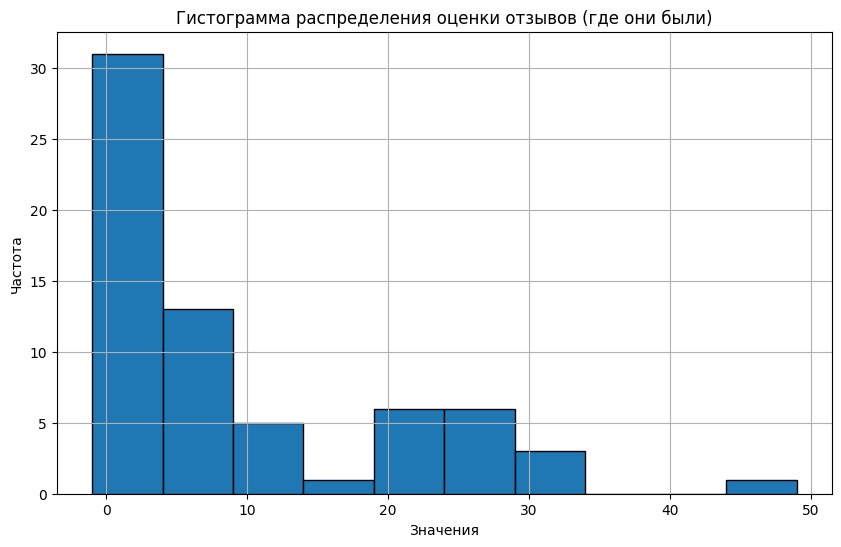

In [ ]:
import matplotlib.pyplot as plt

data = [1, 0, 0, 22, 24, 0, 12, 23, 9, 30, 4, 1, 2, 0, 5, -1, 1, 0, 0, 22, 24, 0, 12, 23, 9, 30, 4, 1, 2, 0, 5, -1, 1, -1, 15, 5, 2, 1, 24, 0, 8, 24, -1, 1, 5, -1, 49, 0, 1, 13, 0, 24, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 5, 1, 1, 0, 0, 1, 2, 24, 4, 4, 22, 1, 0, 4, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 7, 21, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33]

data_without_0 = [x for x in data if x != 0]

plt.figure(figsize=(10, 6))
plt.hist(data_without_0, edgecolor='black')
plt.title('Гистограмма распределения оценки отзывов (где они были)')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()